In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/faang-complete-stock-data/Netflix.csv
/kaggle/input/faang-complete-stock-data/Facebook.csv
/kaggle/input/faang-complete-stock-data/Google.csv
/kaggle/input/faang-complete-stock-data/Amazon.csv
/kaggle/input/faang-complete-stock-data/Apple.csv


1. Get data in proper format

In [12]:
import os
import pandas as pd

# Directory path for your Kaggle dataset
data_dir = '/kaggle/input/faang-complete-stock-data'

# Dictionary to store DataFrames for each company
company_dataframes = {}

# Loop through each CSV file in the directory
for file in os.listdir(data_dir):
    if file.endswith('.csv'):  # Process only CSV files
        company_name = file.split('.')[0]  # Extract company name from file name
        file_path = os.path.join(data_dir, file)

        # Read the CSV file and store it in the dictionary with company name as key
        company_dataframes[company_name] = pd.read_csv(file_path)

# Example: Access a specific company's DataFrame
company_name = 'Apple'  # Replace with the desired company
if company_name in company_dataframes:
    print(f"Head of {company_name} DataFrame:")
    print(company_dataframes[company_name].head())


Head of Apple DataFrame:
         Date      Open      High       Low     Close  Adj Close       Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.101261  469033600.0
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095978  175884800.0
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088934  105728000.0
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.091135   86441600.0
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.093777   73449600.0


In [13]:
# Example: Access a specific company's DataFrame
company_name = 'Netflix'  # Replace with the desired company
if company_name in company_dataframes:
    print(f"Head of {company_name} DataFrame:")
    print(company_dataframes[company_name].head())

# Example: Access a specific company's DataFrame
company_name = 'Amazon'  # Replace with the desired company
if company_name in company_dataframes:
    print(f"Head of {company_name} DataFrame:")
    print(company_dataframes[company_name].head())

# Example: Access a specific company's DataFrame
company_name = 'Facebook'  # Replace with the desired company
if company_name in company_dataframes:
    print(f"Head of {company_name} DataFrame:")
    print(company_dataframes[company_name].head())

# Example: Access a specific company's DataFrame
company_name = 'Google'  # Replace with the desired company
if company_name in company_dataframes:
    print(f"Head of {company_name} DataFrame:")
    print(company_dataframes[company_name].head())

Head of Netflix DataFrame:
         Date      Open      High       Low     Close  Adj Close     Volume
0  2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2  2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3  2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200
Head of Amazon DataFrame:
         Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200
Head of Facebook DataFrame:
         Date

In [14]:
# Initialize an empty DataFrame for merging
merged_data = pd.DataFrame()

# Loop through each CSV file in the directory
for file in os.listdir(data_dir):
    if file.endswith('.csv'):  # Process only CSV files
        company_name = file.split('.')[0]  # Extract company name from file name
        file_path = os.path.join(data_dir, file)

        # Read the CSV file
        df = pd.read_csv(file_path)

        # Extract 'Date' and 'Adj Close' columns
        df = df[['Date', 'Adj Close']]
        
        # Rename 'Adj Close' column to company name
        df = df.rename(columns={'Adj Close': company_name})
        
        # Convert 'Date' column to datetime
        df['Date'] = pd.to_datetime(df['Date'])

        # Merge with the existing merged_data DataFrame on 'Date'
        if merged_data.empty:
            merged_data = df
        else:
            merged_data = pd.merge(merged_data, df, on='Date', how='outer')

# Ensure the 'Date' column is sorted
merged_data = merged_data.sort_values(by='Date')

# Print the head and tail of the merged DataFrame
print("Head of the merged DataFrame:")
print(merged_data.head())

print("\nTail of the merged DataFrame:")
print(merged_data.tail())


Head of the merged DataFrame:
        Date  Netflix  Facebook  Google  Amazon     Apple
0 1980-12-12      NaN       NaN     NaN     NaN  0.101261
1 1980-12-15      NaN       NaN     NaN     NaN  0.095978
2 1980-12-16      NaN       NaN     NaN     NaN  0.088934
3 1980-12-17      NaN       NaN     NaN     NaN  0.091135
4 1980-12-18      NaN       NaN     NaN     NaN  0.093777

Tail of the merged DataFrame:
            Date  Netflix  Facebook       Google  Amazon       Apple
10014 2020-08-31      NaN       NaN  1629.530029     NaN  129.039993
10015 2020-09-01      NaN       NaN  1655.079956     NaN  134.179993
10016 2020-09-02      NaN       NaN  1717.390015     NaN         NaN
10017 2020-09-03      NaN       NaN  1629.510010     NaN         NaN
10018 2020-09-04      NaN       NaN  1581.209961     NaN         NaN


In [15]:
merged_data = merged_data.set_index('Date')
print(merged_data.head())

            Netflix  Facebook  Google  Amazon     Apple
Date                                                   
1980-12-12      NaN       NaN     NaN     NaN  0.101261
1980-12-15      NaN       NaN     NaN     NaN  0.095978
1980-12-16      NaN       NaN     NaN     NaN  0.088934
1980-12-17      NaN       NaN     NaN     NaN  0.091135
1980-12-18      NaN       NaN     NaN     NaN  0.093777


In [16]:
# Define the start and end date for filtering
start_date = '2012-06-01'
end_date = '2020-06-01'

# Filter the data based on the index (Date) being between start and end date
data = merged_data.loc[start_date:end_date]

# Print the head and tail of the filtered DataFrame
print("Head of the filtered DataFrame:")
print(data.head())

print("\nTail of the filtered DataFrame:")
print(data.tail())

Head of the filtered DataFrame:
             Netflix   Facebook      Google      Amazon      Apple
Date                                                              
2012-06-01  8.992857  27.719999  285.775787  208.220001  17.313335
2012-06-04  9.285714  26.900000  289.584595  214.570007  17.415182
2012-06-05  9.261429  25.870001  285.490479  213.210007  17.370125
2012-06-06  9.411428  26.809999  290.575562  217.639999  17.636463
2012-06-07  9.234285  26.309999  289.404419  218.800003  17.644480

Tail of the filtered DataFrame:
               Netflix    Facebook       Google       Amazon      Apple
Date                                                                   
2020-05-26  414.769989  232.199997  1421.369995  2421.860107  79.039993
2020-05-27  419.890015  229.139999  1420.280029  2410.389893  79.384369
2020-05-28  413.440002  225.460007  1418.239990  2401.100098  79.419304
2020-05-29  419.730011  225.089996  1433.520020  2442.370117  79.341949
2020-06-01  425.920013  231.910004

In [17]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Print columns with missing values
print("Missing values in each column:")
print(missing_values)

# Check if there are any missing values in the entire DataFrame
any_missing = data.isnull().any().any()

# Print if there are any missing values
if any_missing:
    print("\nThere are missing values in the DataFrame.")
else:
    print("\nThere are no missing values in the DataFrame.")


Missing values in each column:
Netflix     0
Facebook    0
Google      0
Amazon      0
Apple       0
dtype: int64

There are no missing values in the DataFrame.


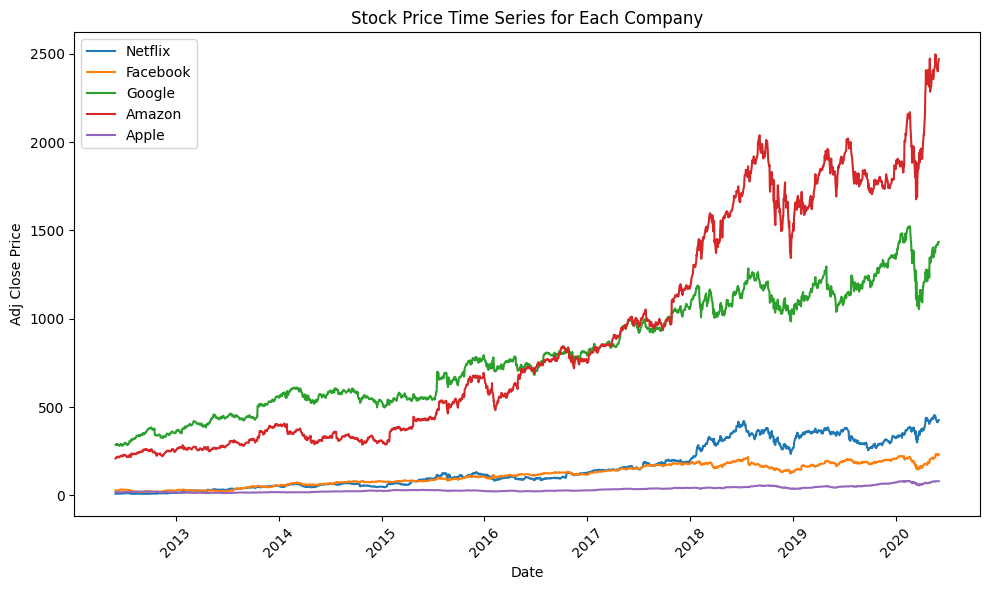

In [18]:
import matplotlib.pyplot as plt

# Set the size of the plot for better visibility
plt.figure(figsize=(10, 6))

# Loop through each company column in the filtered data
for company in data.columns:
    plt.plot(data.index, data[company], label=company)

# Add title and labels
plt.title('Stock Price Time Series for Each Company')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to identify each company
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


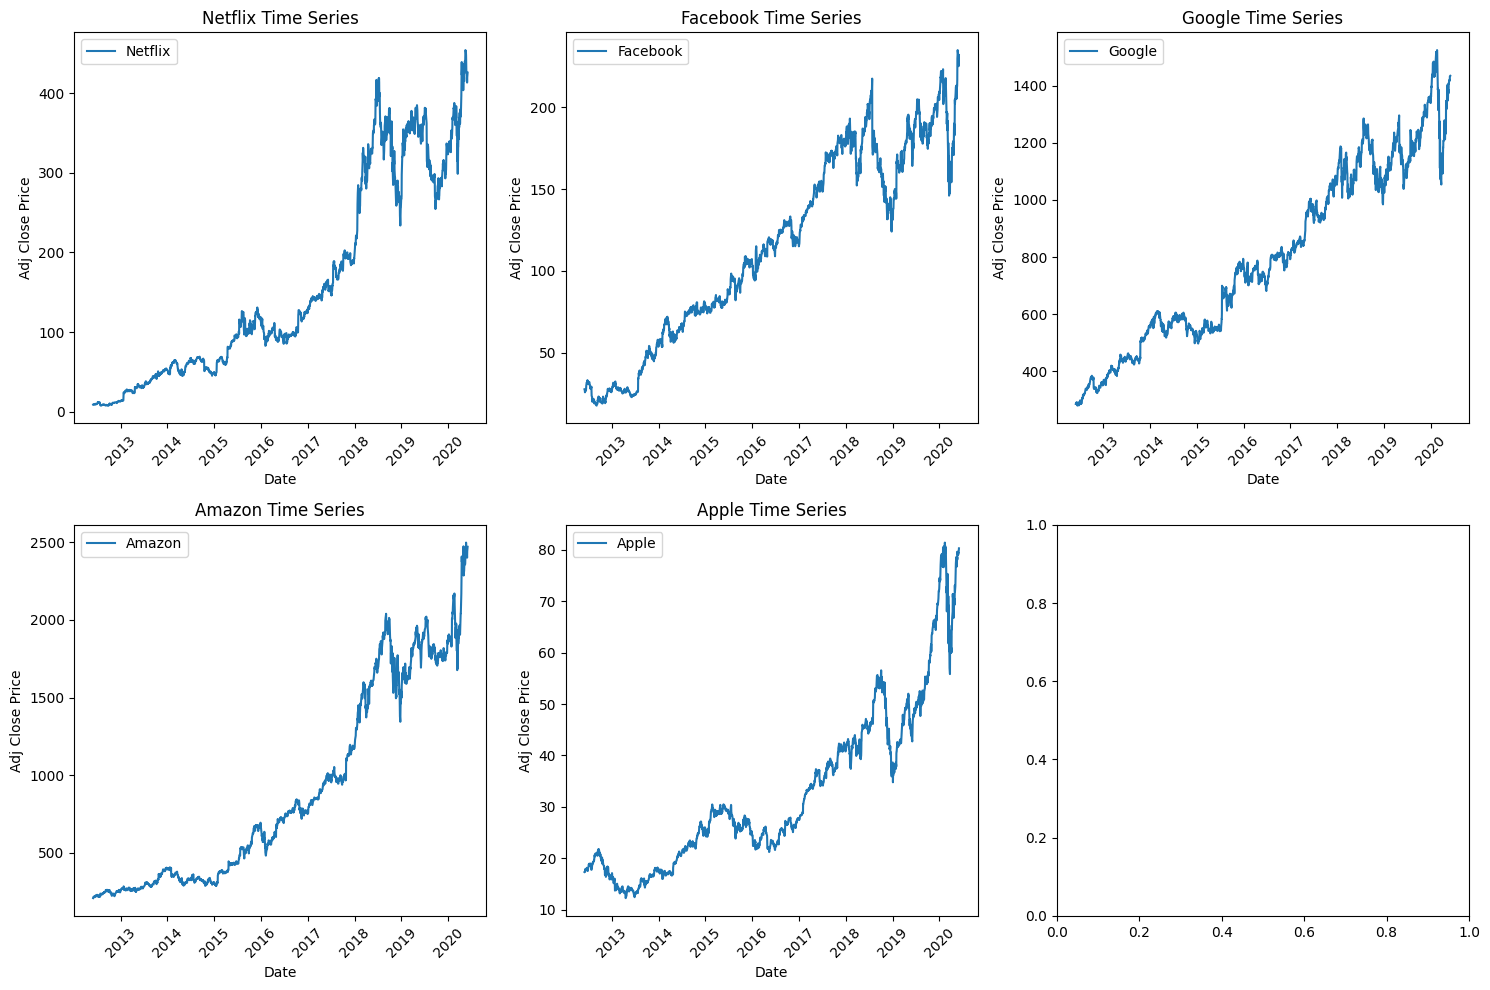

In [19]:
import matplotlib.pyplot as plt

# Set the number of rows and columns for subplots
num_companies = len(data.columns)
num_rows = num_companies // 3 + (num_companies % 3 > 0)  # Adjust to fit all plots

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  # 3 columns, dynamic rows
axes = axes.flatten()  # Flatten the 2D axes array to easily iterate over it

# Plot each company's data in a separate subplot
for i, company in enumerate(data.columns):
    axes[i].plot(data.index, data[company], label=company, color='tab:blue')
    axes[i].set_title(f'{company} Time Series')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Adj Close Price')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [20]:
log_data = np.log(data)

In [21]:
log_data.head()

,Netflix,Facebook,Google,Amazon,Apple
Date,,,,,
2012-06-01,2.196431,3.322154,5.655208,5.338595,2.851477
2012-06-04,2.228477,3.292126,5.668447,5.368636,2.857342
2012-06-05,2.225858,3.253084,5.654209,5.362278,2.854752
2012-06-06,2.241925,3.288775,5.671864,5.382842,2.869969
2012-06-07,2.222923,3.269949,5.667825,5.388158,2.870423


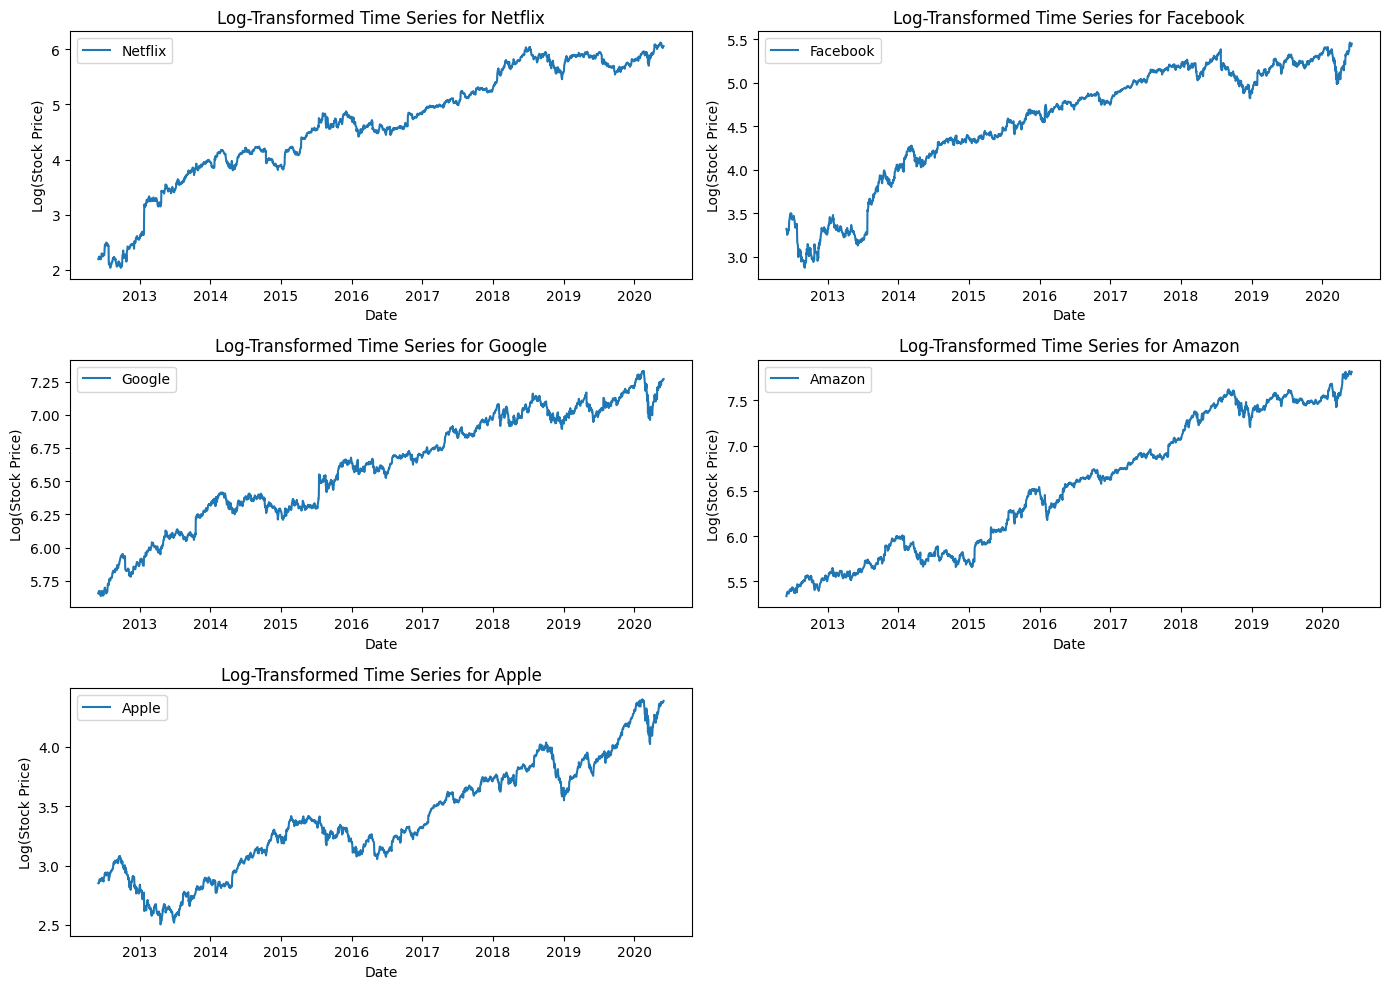

In [40]:
plt.figure(figsize=(14, 10))

for i, company in enumerate(log_data.columns, 1):  
    plt.subplot(3, 2, i)
    plt.plot(log_data.index, log_data[company], label=company)
    plt.title(f'Log-Transformed Time Series for {company}')
    plt.xlabel('Date')
    plt.ylabel('Log(Stock Price)')
    plt.legend()

plt.tight_layout()
plt.show()


In [23]:
from scipy.stats import kruskal

# Add Month column to log_data for grouping
log_data['Month'] = log_data.index.month

# Perform the Kruskal-Wallis test for each company
for company in log_data.columns[:-1]:  # Exclude 'Month' column
    monthly_data = [group[1][company].values for group in log_data.groupby('Month')]
    stat, p_value = kruskal(*monthly_data)
    print(f"{company}: Kruskal-Wallis H-statistic = {stat:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"Significant seasonality detected for {company} (p < 0.05).\n")
    else:
        print(f"No significant seasonality detected for {company} (p >= 0.05).\n")


Netflix: Kruskal-Wallis H-statistic = 28.4095, p-value = 0.0028
Significant seasonality detected for Netflix (p < 0.05).

Facebook: Kruskal-Wallis H-statistic = 16.9799, p-value = 0.1085
No significant seasonality detected for Facebook (p >= 0.05).

Google: Kruskal-Wallis H-statistic = 25.6691, p-value = 0.0073
Significant seasonality detected for Google (p < 0.05).

Amazon: Kruskal-Wallis H-statistic = 19.7492, p-value = 0.0489
Significant seasonality detected for Amazon (p < 0.05).

Apple: Kruskal-Wallis H-statistic = 16.9559, p-value = 0.1092
No significant seasonality detected for Apple (p >= 0.05).



Decomposition for Netflix:


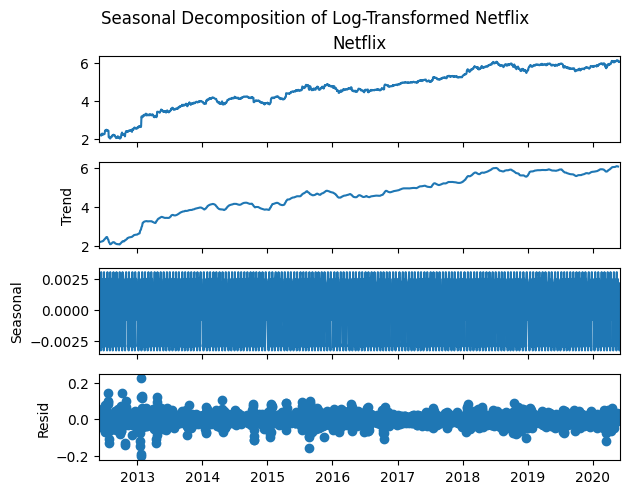

Decomposition for Facebook:


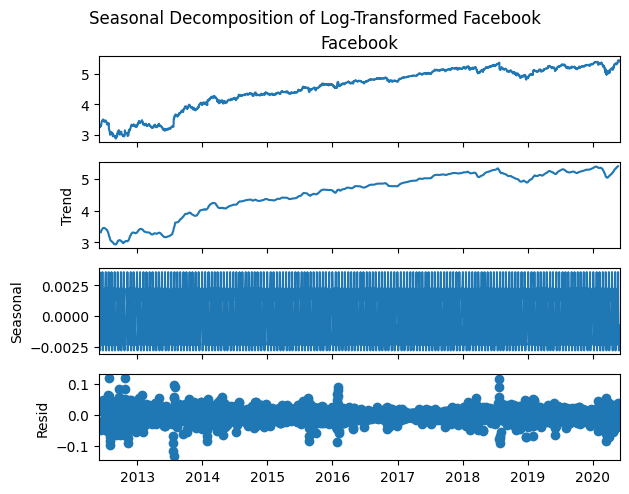

Decomposition for Google:


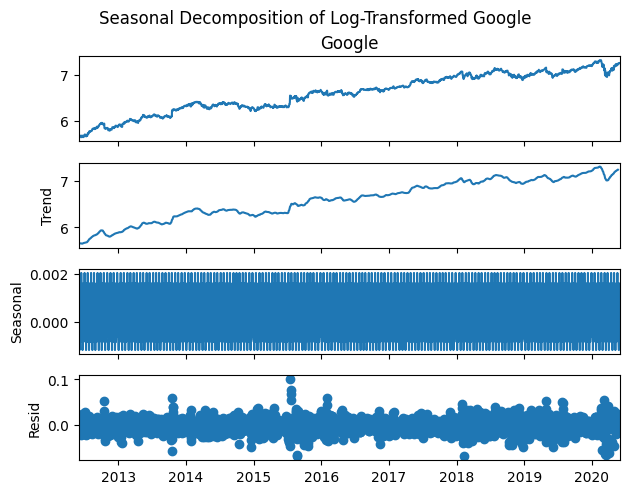

Decomposition for Amazon:


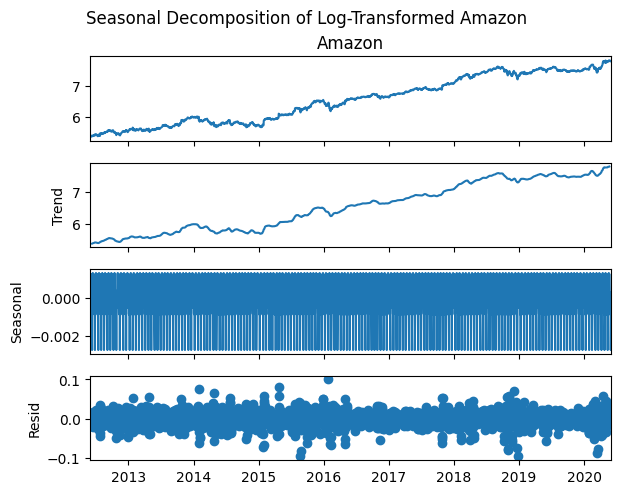

Decomposition for Apple:


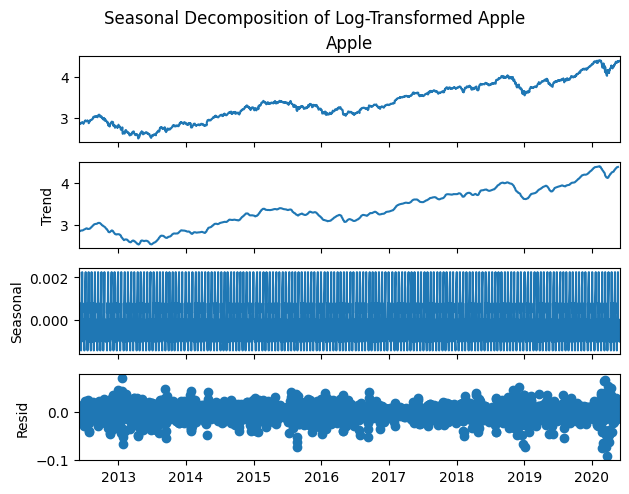

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose each company's log-transformed time series
for company in log_data.columns[:-1]:  # Exclude 'Month' column
    decomposition = seasonal_decompose(log_data[company].dropna(), model='additive', period=12)  # Monthly seasonality
    print(f"Decomposition for {company}:")

    # Plot decomposition
    decomposition.plot()
    plt.suptitle(f'Seasonal Decomposition of Log-Transformed {company}', y=1.02)
    plt.show()


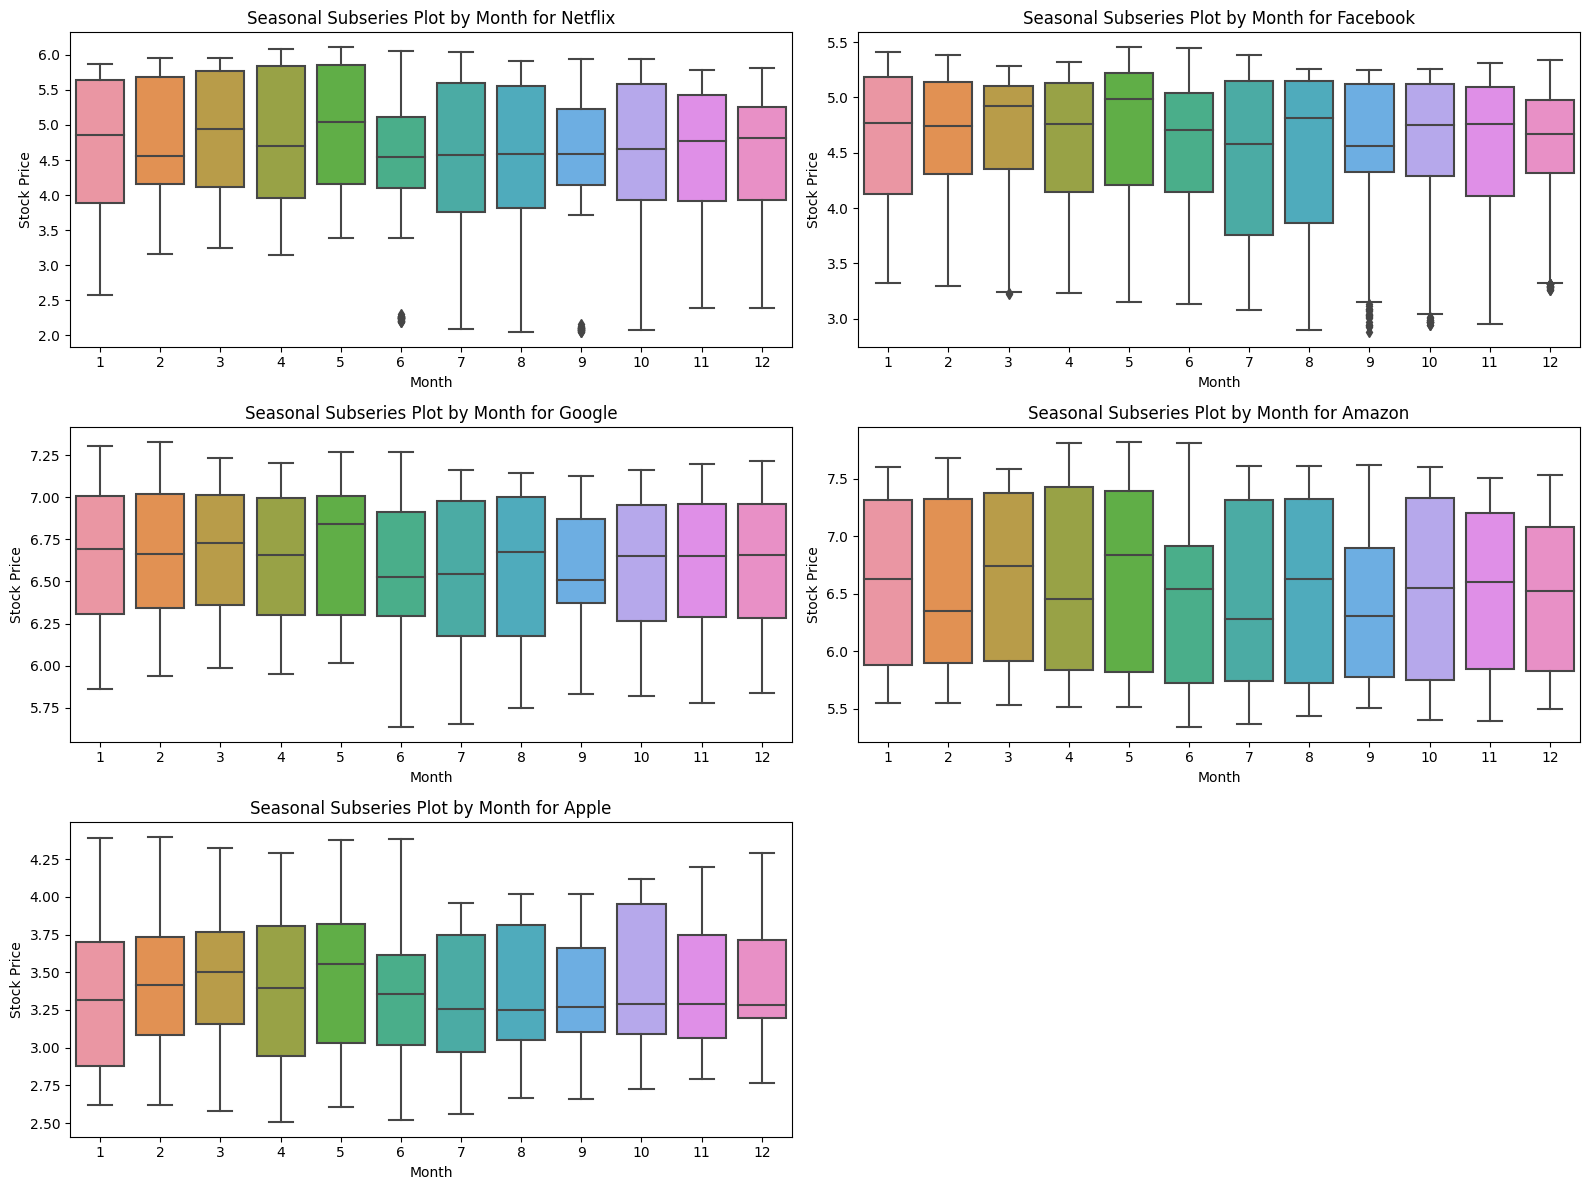

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index to use `Date` as a column for plotting
log_data_reset = log_data.reset_index()

# Plot seasonal subseries plots for each company
plt.figure(figsize=(16, 12))
for i, company in enumerate(log_data.columns[:-1], 1):  # Skip 'Month' column
    plt.subplot(3, 2, i)
    sns.boxplot(x='Month', y=company, data=log_data_reset)
    plt.title(f'Seasonal Subseries Plot by Month for {company}')
    plt.xlabel('Month')
    plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()


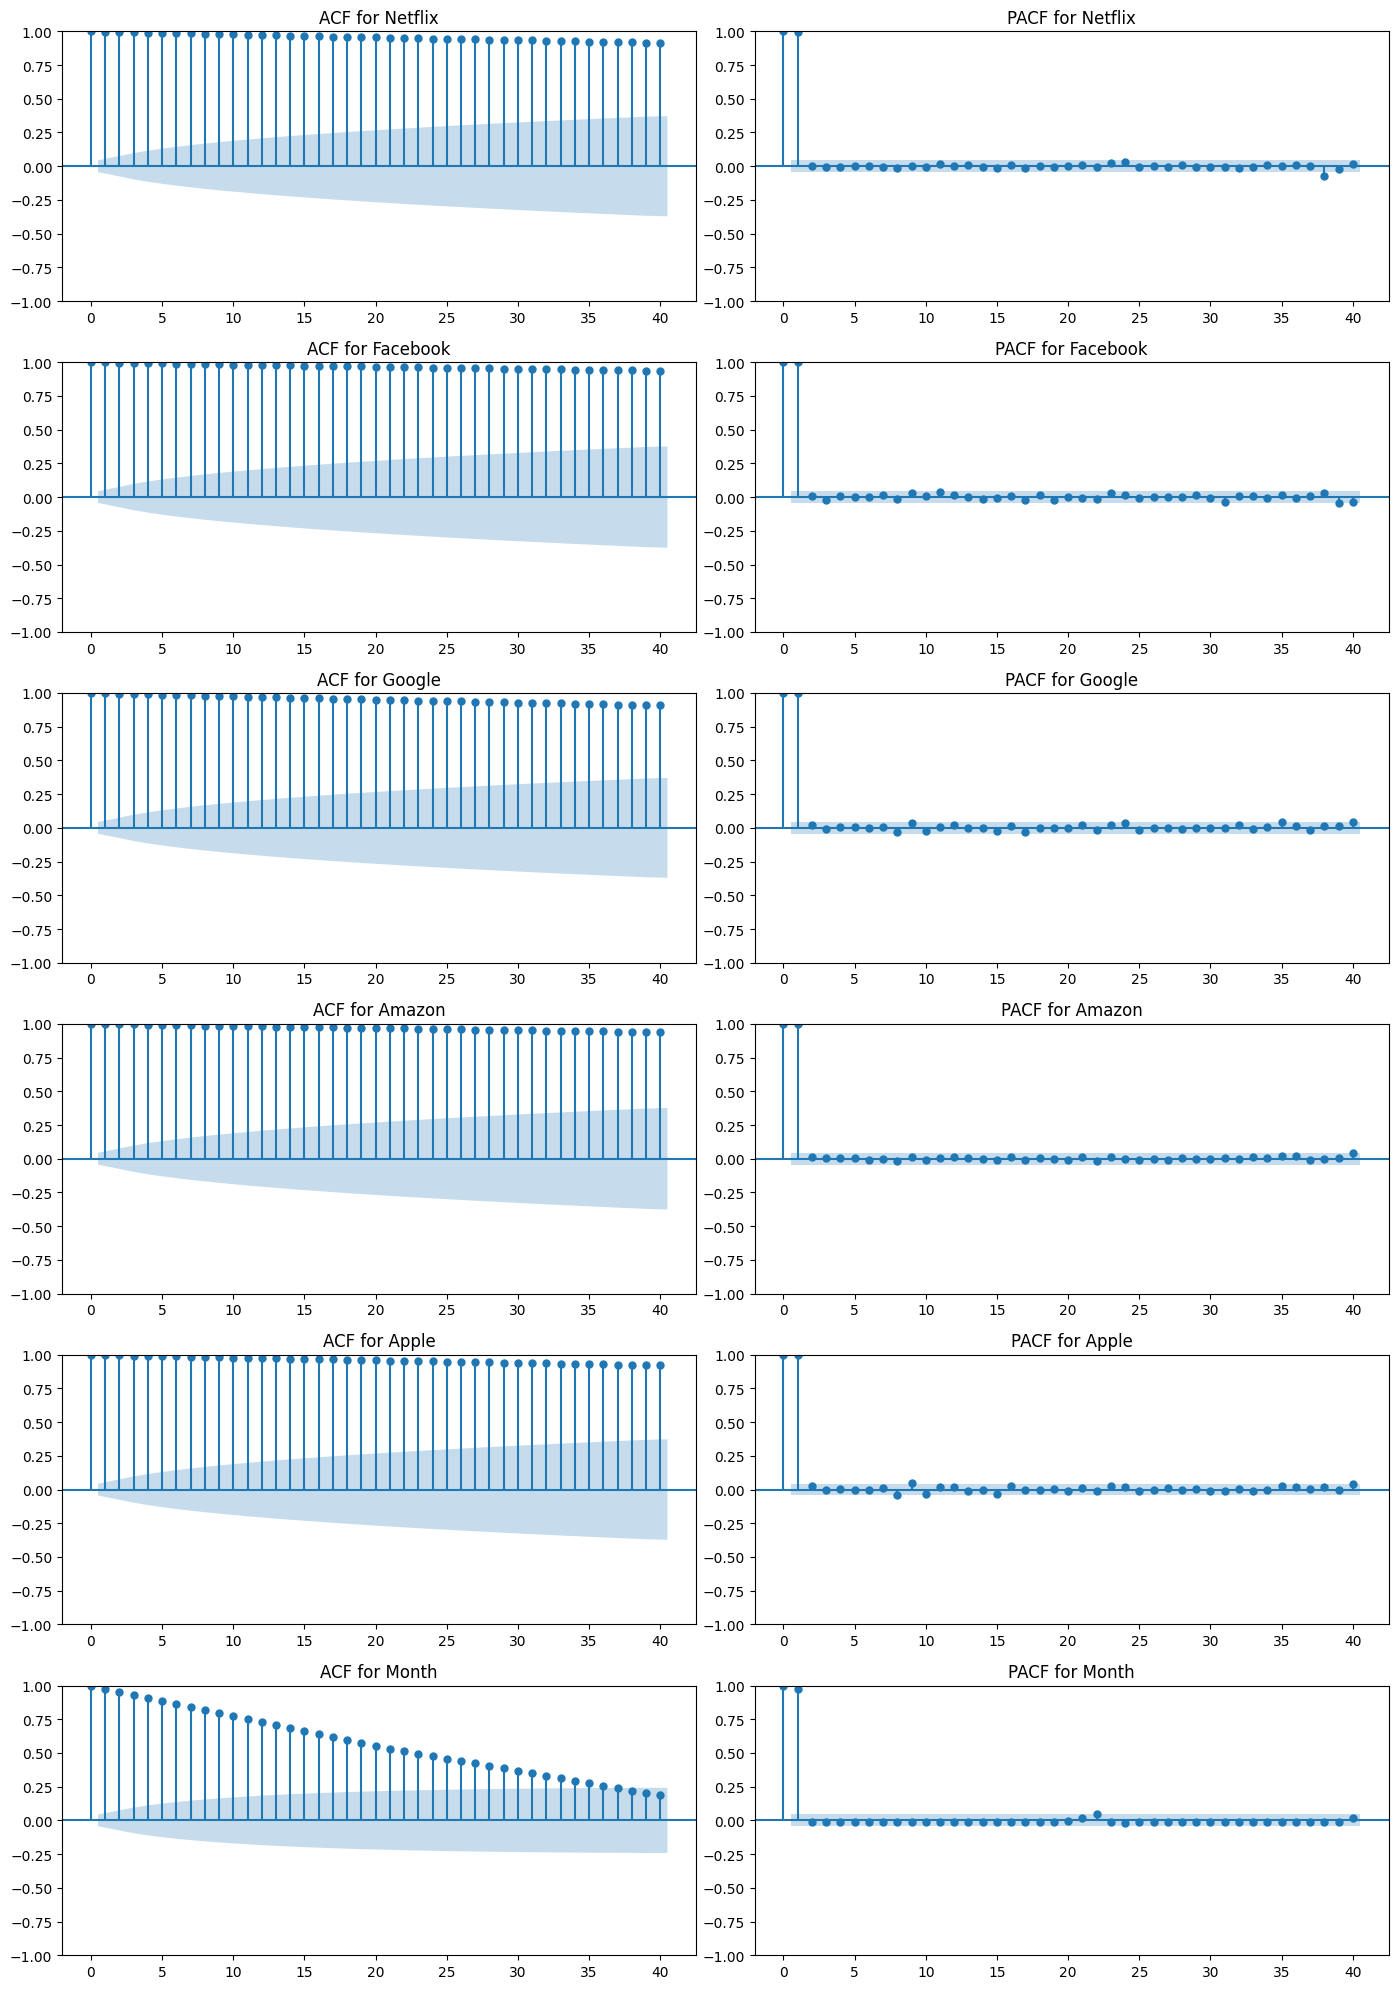

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Define number of companies
num_companies = len(log_data.columns)

# Plot ACF and PACF for each log-transformed series
plt.figure(figsize=(14, 20))
for i, company in enumerate(log_data.columns, 1):
    plt.subplot(num_companies, 2, 2*i - 1)
    plot_acf(log_data[company].dropna(), ax=plt.gca(), lags=40, title=f'ACF for {company}')
    
    plt.subplot(num_companies, 2, 2*i)
    plot_pacf(log_data[company].dropna(), ax=plt.gca(), lags=40, title=f'PACF for {company}')

plt.tight_layout()
plt.show()


In [27]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test for each company
for company in log_data.columns[:-1]:  # Skip 'Month' if it was added
    result = adfuller(log_data[company].dropna())  # Ensure no NaNs in the data
    p_value = result[1]
    print(f"{company}: ADF Statistic = {result[0]:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"{company} is stationary (p < 0.05)\n")
    else:
        print(f"{company} is not stationary (p >= 0.05)\n")


Netflix: ADF Statistic = -1.9996, p-value = 0.2868
Netflix is not stationary (p >= 0.05)

Facebook: ADF Statistic = -1.1448, p-value = 0.6969
Facebook is not stationary (p >= 0.05)

Google: ADF Statistic = -1.7340, p-value = 0.4137
Google is not stationary (p >= 0.05)

Amazon: ADF Statistic = -0.3271, p-value = 0.9216
Amazon is not stationary (p >= 0.05)

Apple: ADF Statistic = 0.1518, p-value = 0.9694
Apple is not stationary (p >= 0.05)



In [28]:
from statsmodels.tsa.stattools import grangercausalitytests

# Define maximum number of lags to test for causation
max_lag = 5
significance_level = 0.05  # Significance level for causation

# Check Granger causality between each pair of companies
causality_results = {}  # Dictionary to store results

for i, company_1 in enumerate(log_data.columns[:-1]):  # Exclude 'Month' if added
    for j, company_2 in enumerate(log_data.columns[:-1]):
        if company_1 != company_2:
            print(f"\nTesting if {company_1} Granger-causes {company_2}:")
            test_result = grangercausalitytests(log_data[[company_2, company_1]].dropna(), max_lag, verbose=False)

            # Extract and print p-values for each lag
            p_values = [round(test_result[lag][0]['ssr_ftest'][1], 4) for lag in range(1, max_lag + 1)]
            causality_results[(company_1, company_2)] = p_values

            # Interpret results based on significance level
            for lag, p_value in enumerate(p_values, start=1):
                if p_value < significance_level:
                    print(f"  Lag {lag}: p-value = {p_value} (Significant causation)")
                else:
                    print(f"  Lag {lag}: p-value = {p_value} (No significant causation)")



Testing if Netflix Granger-causes Facebook:
  Lag 1: p-value = 0.0279 (Significant causation)
  Lag 2: p-value = 0.1043 (No significant causation)
  Lag 3: p-value = 0.1671 (No significant causation)
  Lag 4: p-value = 0.2603 (No significant causation)
  Lag 5: p-value = 0.4013 (No significant causation)

Testing if Netflix Granger-causes Google:


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Lag 1: p-value = 0.0109 (Significant causation)
  Lag 2: p-value = 0.0489 (Significant causation)
  Lag 3: p-value = 0.0943 (No significant causation)
  Lag 4: p-value = 0.0797 (No significant causation)
  Lag 5: p-value = 0.1403 (No significant causation)

Testing if Netflix Granger-causes Amazon:
  Lag 1: p-value = 0.3574 (No significant causation)
  Lag 2: p-value = 0.5633 (No significant causation)
  Lag 3: p-value = 0.6933 (No significant causation)
  Lag 4: p-value = 0.5835 (No significant causation)
  Lag 5: p-value = 0.6998 (No significant causation)

Testing if Netflix Granger-causes Apple:
  Lag 1: p-value = 0.1275 (No significant causation)
  Lag 2: p-value = 0.0067 (Significant causation)
  Lag 3: p-value = 0.0125 (Significant causation)
  Lag 4: p-value = 0.024 (Significant causation)
  Lag 5: p-value = 0.0242 (Significant causation)

Testing if Facebook Granger-causes Netflix:


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Lag 1: p-value = 0.3984 (No significant causation)
  Lag 2: p-value = 0.5508 (No significant causation)
  Lag 3: p-value = 0.2728 (No significant causation)
  Lag 4: p-value = 0.2646 (No significant causation)
  Lag 5: p-value = 0.3749 (No significant causation)

Testing if Facebook Granger-causes Google:
  Lag 1: p-value = 0.0556 (No significant causation)
  Lag 2: p-value = 0.1828 (No significant causation)
  Lag 3: p-value = 0.2978 (No significant causation)
  Lag 4: p-value = 0.4485 (No significant causation)
  Lag 5: p-value = 0.4562 (No significant causation)

Testing if Facebook Granger-causes Amazon:
  Lag 1: p-value = 0.5204 (No significant causation)
  Lag 2: p-value = 0.0041 (Significant causation)
  Lag 3: p-value = 0.0017 (Significant causation)
  Lag 4: p-value = 0.001 (Significant causation)
  Lag 5: p-value = 0.0021 (Significant causation)

Testing if Facebook Granger-causes Apple:


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Lag 1: p-value = 0.0721 (No significant causation)
  Lag 2: p-value = 0.0664 (No significant causation)
  Lag 3: p-value = 0.1431 (No significant causation)
  Lag 4: p-value = 0.2061 (No significant causation)
  Lag 5: p-value = 0.2816 (No significant causation)

Testing if Google Granger-causes Netflix:
  Lag 1: p-value = 0.4836 (No significant causation)
  Lag 2: p-value = 0.7344 (No significant causation)
  Lag 3: p-value = 0.8804 (No significant causation)
  Lag 4: p-value = 0.1823 (No significant causation)
  Lag 5: p-value = 0.2771 (No significant causation)

Testing if Google Granger-causes Facebook:
  Lag 1: p-value = 0.7027 (No significant causation)
  Lag 2: p-value = 0.0902 (No significant causation)
  Lag 3: p-value = 0.1281 (No significant causation)
  Lag 4: p-value = 0.138 (No significant causation)
  Lag 5: p-value = 0.0597 (No significant causation)

Testing if Google Granger-causes Amazon:


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Lag 1: p-value = 0.7262 (No significant causation)
  Lag 2: p-value = 0.5777 (No significant causation)
  Lag 3: p-value = 0.3484 (No significant causation)
  Lag 4: p-value = 0.072 (No significant causation)
  Lag 5: p-value = 0.1109 (No significant causation)

Testing if Google Granger-causes Apple:
  Lag 1: p-value = 0.299 (No significant causation)
  Lag 2: p-value = 0.1067 (No significant causation)
  Lag 3: p-value = 0.1502 (No significant causation)
  Lag 4: p-value = 0.1334 (No significant causation)
  Lag 5: p-value = 0.1239 (No significant causation)

Testing if Amazon Granger-causes Netflix:


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Lag 1: p-value = 0.223 (No significant causation)
  Lag 2: p-value = 0.1176 (No significant causation)
  Lag 3: p-value = 0.2229 (No significant causation)
  Lag 4: p-value = 0.1235 (No significant causation)
  Lag 5: p-value = 0.0654 (No significant causation)

Testing if Amazon Granger-causes Facebook:
  Lag 1: p-value = 0.5041 (No significant causation)
  Lag 2: p-value = 0.0631 (No significant causation)
  Lag 3: p-value = 0.0963 (No significant causation)
  Lag 4: p-value = 0.1432 (No significant causation)
  Lag 5: p-value = 0.183 (No significant causation)

Testing if Amazon Granger-causes Google:


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Lag 1: p-value = 0.0069 (Significant causation)
  Lag 2: p-value = 0.0345 (Significant causation)
  Lag 3: p-value = 0.0372 (Significant causation)
  Lag 4: p-value = 0.0653 (No significant causation)
  Lag 5: p-value = 0.0687 (No significant causation)

Testing if Amazon Granger-causes Apple:
  Lag 1: p-value = 0.2659 (No significant causation)
  Lag 2: p-value = 0.2279 (No significant causation)
  Lag 3: p-value = 0.2912 (No significant causation)
  Lag 4: p-value = 0.4276 (No significant causation)
  Lag 5: p-value = 0.4814 (No significant causation)

Testing if Apple Granger-causes Netflix:


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Lag 1: p-value = 0.4208 (No significant causation)
  Lag 2: p-value = 0.0536 (No significant causation)
  Lag 3: p-value = 0.0875 (No significant causation)
  Lag 4: p-value = 0.0576 (No significant causation)
  Lag 5: p-value = 0.0867 (No significant causation)

Testing if Apple Granger-causes Facebook:
  Lag 1: p-value = 0.6803 (No significant causation)
  Lag 2: p-value = 0.0045 (Significant causation)
  Lag 3: p-value = 0.0113 (Significant causation)
  Lag 4: p-value = 0.0239 (Significant causation)
  Lag 5: p-value = 0.0277 (Significant causation)

Testing if Apple Granger-causes Google:


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Lag 1: p-value = 0.2492 (No significant causation)
  Lag 2: p-value = 0.0039 (Significant causation)
  Lag 3: p-value = 0.0039 (Significant causation)
  Lag 4: p-value = 0.0076 (Significant causation)
  Lag 5: p-value = 0.0047 (Significant causation)

Testing if Apple Granger-causes Amazon:
  Lag 1: p-value = 0.2377 (No significant causation)
  Lag 2: p-value = 0.007 (Significant causation)
  Lag 3: p-value = 0.0144 (Significant causation)
  Lag 4: p-value = 0.0324 (Significant causation)
  Lag 5: p-value = 0.028 (Significant causation)


In [29]:
log_data=log_data.drop(columns=['Month'])

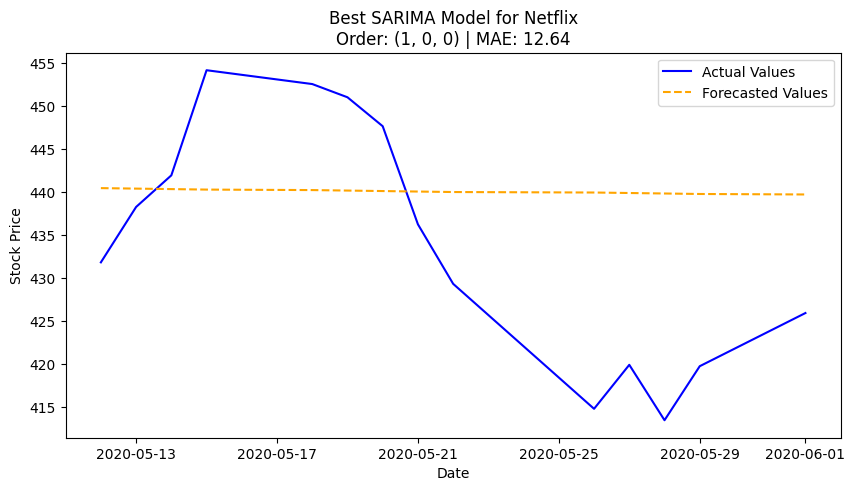

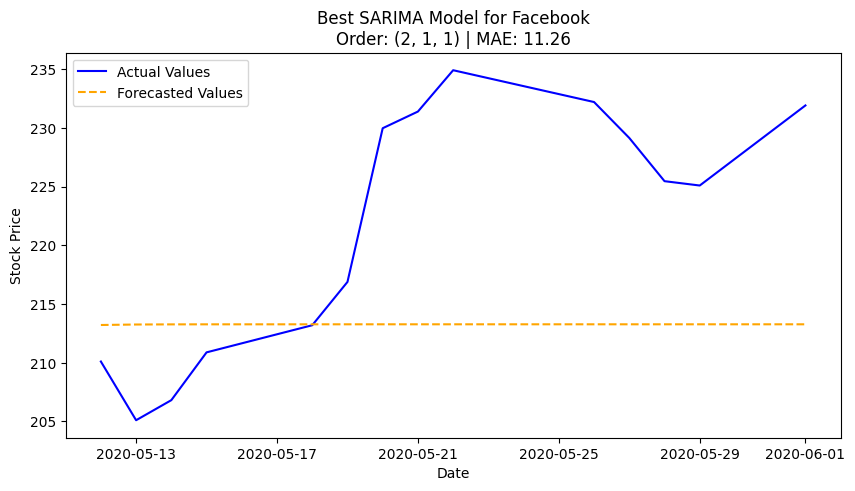

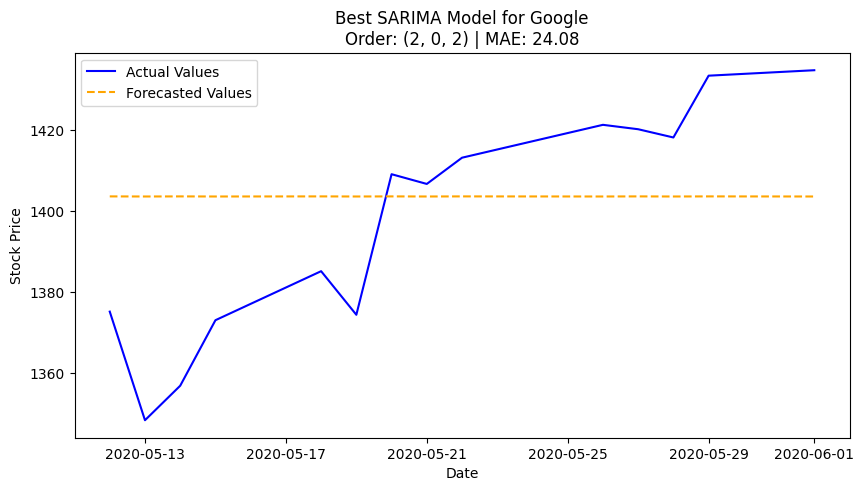

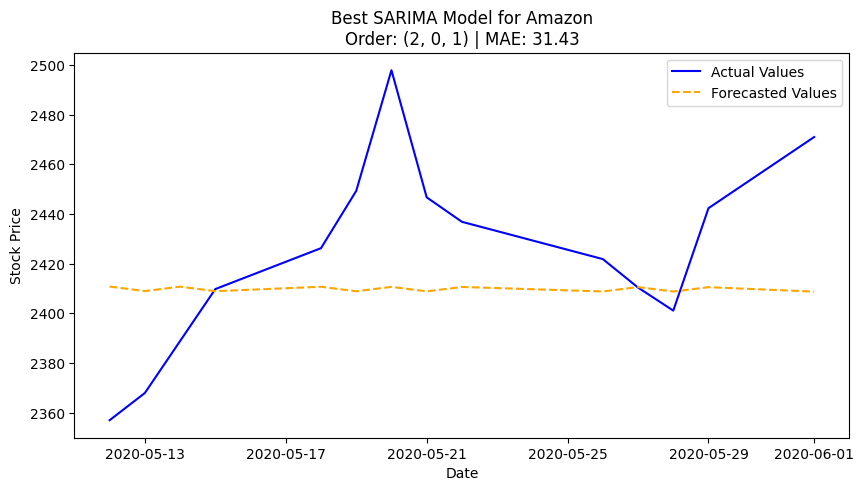

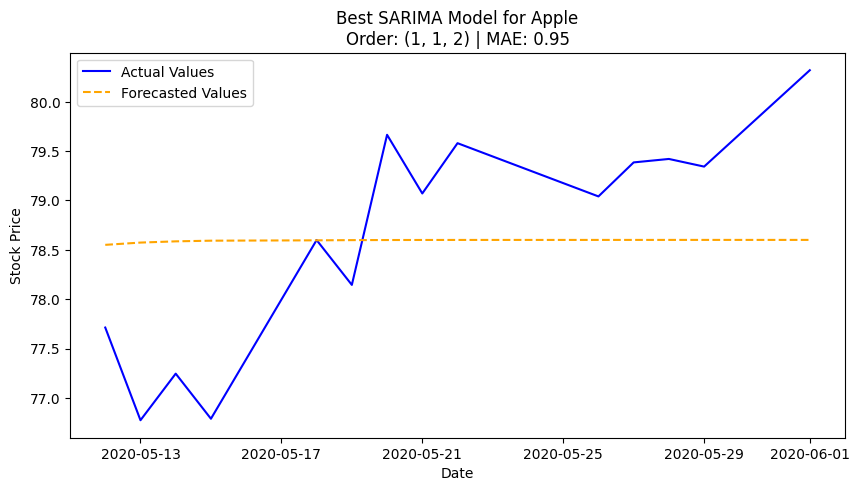

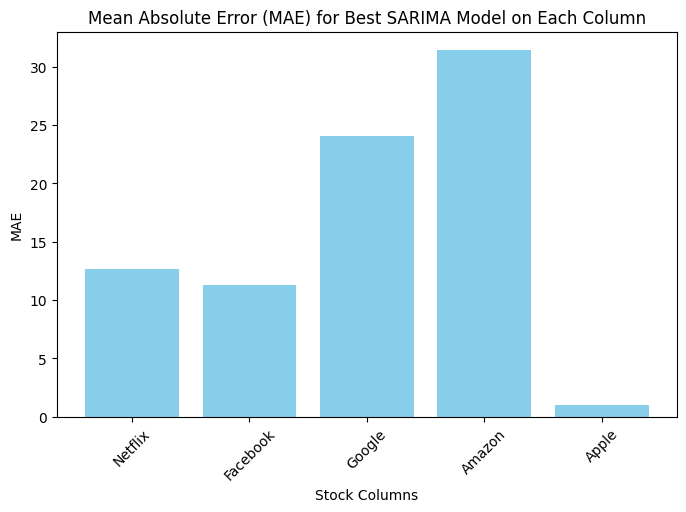

Best MAE values and orders for SARIMA model on each column:
Netflix: Order = (1, 0, 0), MAE = 12.64
Facebook: Order = (2, 1, 1), MAE = 11.26
Google: Order = (2, 0, 2), MAE = 24.08
Amazon: Order = (2, 0, 1), MAE = 31.43
Apple: Order = (1, 1, 2), MAE = 0.95


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import warnings

# Suppress warnings from statsmodels
warnings.filterwarnings("ignore")

# Define test set size
test_size = 14

# Parameter grid for (p, d, q) values
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]

# Initialize dictionary to store best MAE values and best model orders for each column
best_mae_values = {}
best_model_orders = {}

# Loop through each column in log_data to apply SARIMA model
for col in log_data.columns:
    # Split data into training and test sets
    train_data = log_data[col][:-test_size]
    test_data = log_data[col][-test_size:]
    
    # Track the best MAE and model parameters for this column
    best_mae = float("inf")
    best_order = None
    best_forecast = None

    # Grid search over (p, d, q) parameters
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Fit the SARIMA model
                    model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(0, 0, 0, 0))
                    model_fit = model.fit(disp=False)
                    
                    # Forecast for the test period
                    forecast_log = model_fit.get_forecast(steps=test_size)
                    forecast_log_values = forecast_log.predicted_mean
                    
                    # Transform forecast back to the original scale by exponentiating
                    forecast_values = np.exp(forecast_log_values)
                    actual_values = np.exp(test_data)
                    
                    # Calculate MAE
                    mae = mean_absolute_error(actual_values, forecast_values)
                    
                    # Update best model if current MAE is lower
                    if mae < best_mae:
                        best_mae = mae
                        best_order = (p, d, q)
                        best_forecast = forecast_values

                except Exception as e:
                    # Handle cases where model fitting fails
                    print(f"Model fitting failed for {col} with order ({p}, {d}, {q}): {e}")
                    continue

    # Store the best results for this column
    best_mae_values[col] = best_mae
    best_model_orders[col] = best_order

    # Plot the best actual vs forecasted values for the column
    plt.figure(figsize=(10, 5))
    plt.plot(actual_values.index, actual_values, label='Actual Values', color='blue')
    plt.plot(actual_values.index, best_forecast, label='Forecasted Values', linestyle='--', color='orange')
    plt.title(f"Best SARIMA Model for {col}\nOrder: {best_order} | MAE: {best_mae:.2f}")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

# Plot MAE values for the best model of each column
plt.figure(figsize=(8, 5))
plt.bar(best_mae_values.keys(), best_mae_values.values(), color='skyblue')
plt.title("Mean Absolute Error (MAE) for Best SARIMA Model on Each Column")
plt.xlabel("Stock Columns")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.show()

# Print MAE values and model order for the best model of each column
print("Best MAE values and orders for SARIMA model on each column:")
for col, mae in best_mae_values.items():
    print(f"{col}: Order = {best_model_orders[col]}, MAE = {mae:.2f}")


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


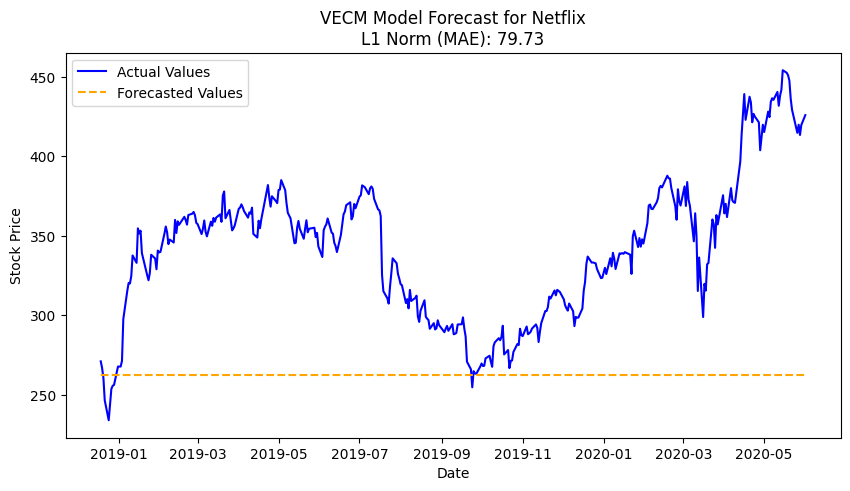

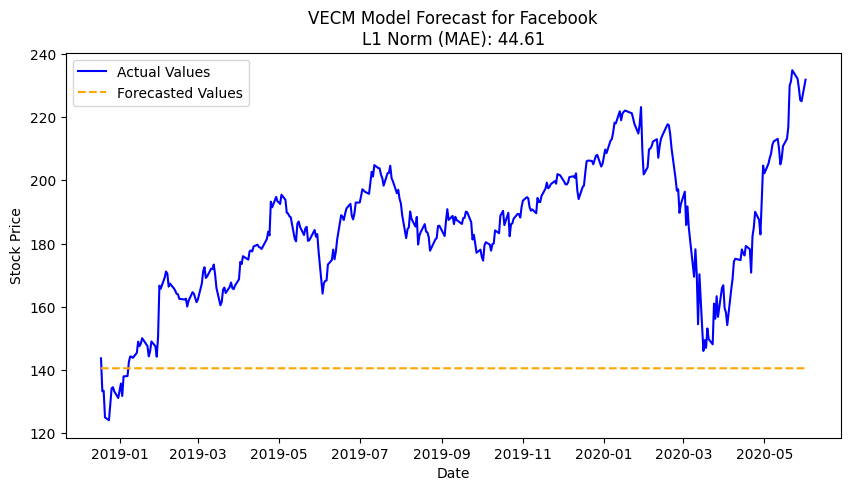

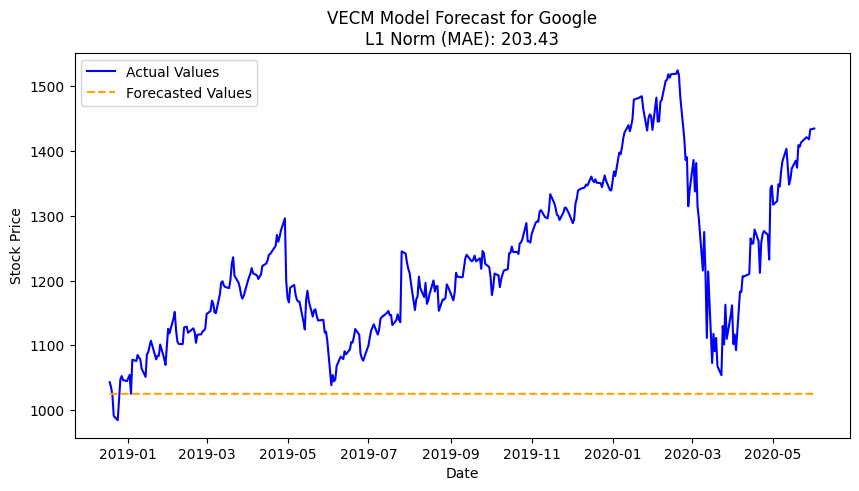

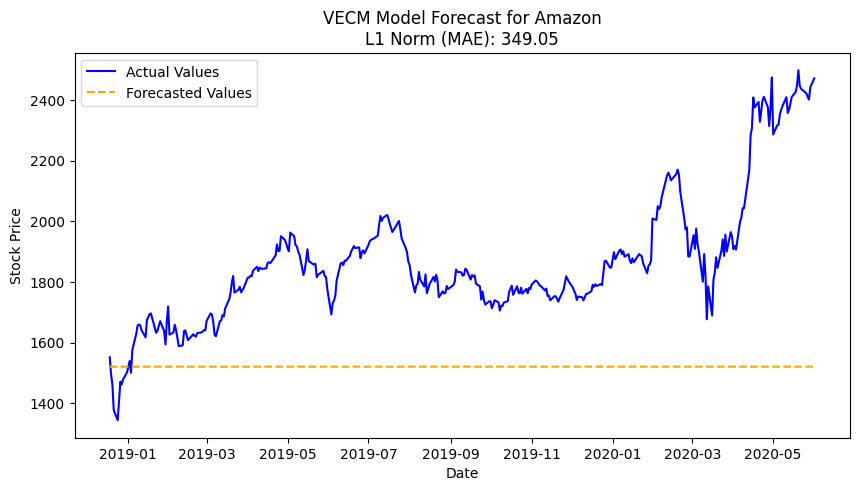

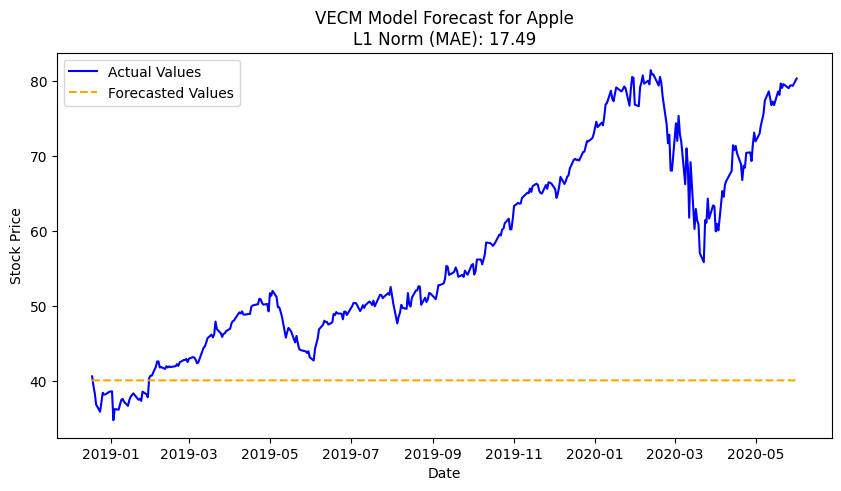

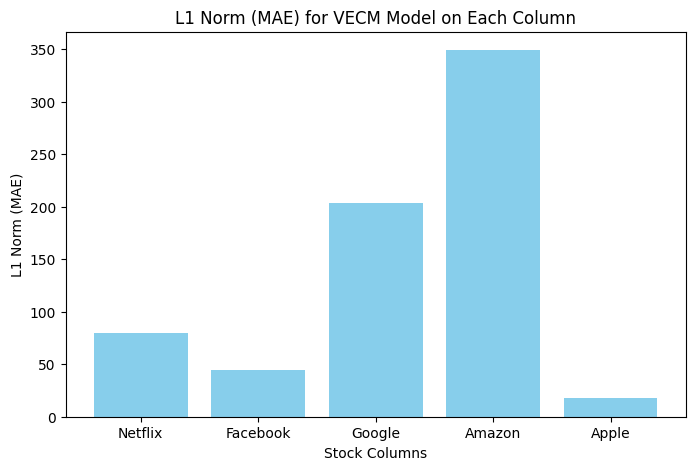

L1 Norm (MAE) values for VECM model on each column:
Netflix: L1 Norm (MAE) = 79.73
Facebook: L1 Norm (MAE) = 44.61
Google: L1 Norm (MAE) = 203.43
Amazon: L1 Norm (MAE) = 349.05
Apple: L1 Norm (MAE) = 17.49


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
from sklearn.metrics import mean_absolute_error

# Define the number of days to keep as test data
test_size = 365

# Split into training and test sets
train_data = log_data.iloc[:-test_size]
test_data = log_data.iloc[-test_size:]

# Step 1: Determine the number of co-integrating relationships using Johansen's test
coint_test = select_coint_rank(train_data, det_order=0, k_ar_diff=1)
rank = coint_test.rank  # number of co-integrating relationships

# Step 2: Fit the VECM model with the determined rank
vecm_model = VECM(train_data, k_ar_diff=1, coint_rank=rank)
vecm_fit = vecm_model.fit()

# Step 3: Forecast for the test period (14 days ahead)
forecast_log = vecm_fit.predict(steps=test_size)
forecast_log_df = pd.DataFrame(forecast_log, index=test_data.index, columns=test_data.columns)

# Transform the forecast back to the original scale
forecast_values = np.exp(forecast_log_df)
actual_values = np.exp(test_data)

# Calculate the L1 norm (MAE) for each column
mae_values = {}
for col in actual_values.columns:
    mae = mean_absolute_error(actual_values[col], forecast_values[col])
    mae_values[col] = mae

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(actual_values.index, actual_values[col], label='Actual Values', color='blue')
    plt.plot(forecast_values.index, forecast_values[col], label='Forecasted Values', linestyle='--', color='orange')
    plt.title(f"VECM Model Forecast for {col}\nL1 Norm (MAE): {mae:.2f}")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

# Plot the L1 norm (MAE) values for each column in a bar chart
plt.figure(figsize=(8, 5))
plt.bar(mae_values.keys(), mae_values.values(), color='skyblue')
plt.title("L1 Norm (MAE) for VECM Model on Each Column")
plt.xlabel("Stock Columns")
plt.ylabel("L1 Norm (MAE)")
plt.show()

# Print L1 norm (MAE) values for all columns
print("L1 Norm (MAE) values for VECM model on each column:")
for col, mae in mae_values.items():
    print(f"{col}: L1 Norm (MAE) = {mae:.2f}")


In [32]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity using ADF test
def check_stationarity(data):
    result = adfuller(data.dropna())
    return result[1] < 0.05  # Returns True if p-value < 0.05 (stationary)

# Load your log_data here
# log_data = pd.read_csv(...) # Assuming log_data is already loaded

# Initialize variables to track differencing order for each column
differencing_order = {col: 0 for col in log_data.columns}
stationary_columns = {col: False for col in log_data.columns}
diff_data = log_data.copy()

# Loop until all columns are stationary
while not all(stationary_columns.values()):
    for col in log_data.columns:
        if not stationary_columns[col]:
            # Apply differencing on the column
            diff_data[col] = diff_data[col].diff()
            differencing_order[col] += 1
            # Check stationarity
            stationary_columns[col] = check_stationarity(diff_data[col])
            print(f"Column: {col}, Differencing Order: {differencing_order[col]}, Stationary: {stationary_columns[col]}")

print("Differencing orders:", differencing_order)


Column: Netflix, Differencing Order: 1, Stationary: True
Column: Facebook, Differencing Order: 1, Stationary: True
Column: Google, Differencing Order: 1, Stationary: True
Column: Amazon, Differencing Order: 1, Stationary: True
Column: Apple, Differencing Order: 1, Stationary: True
Differencing orders: {'Netflix': 1, 'Facebook': 1, 'Google': 1, 'Amazon': 1, 'Apple': 1}


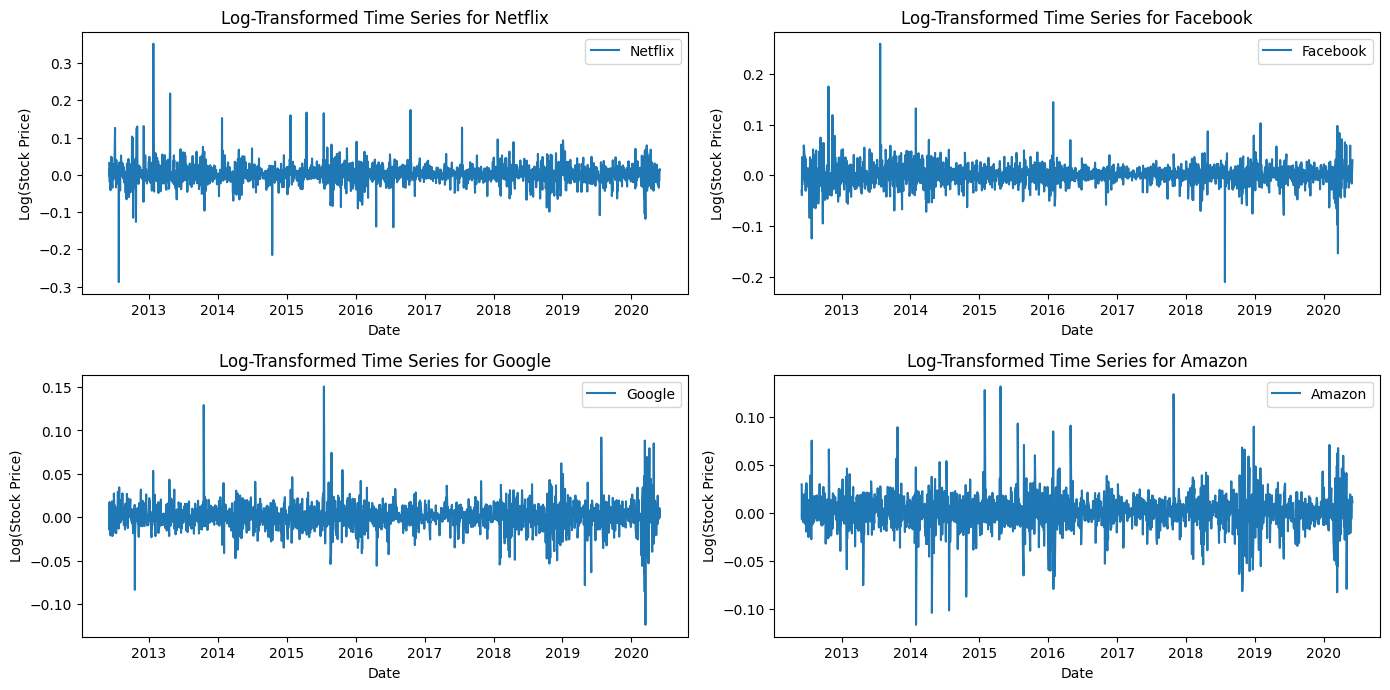

In [33]:
plt.figure(figsize=(14, 10))

for i, company in enumerate(diff_data.columns[:-1], 1):  
    plt.subplot(3, 2, i)
    plt.plot(diff_data.index, diff_data[company], label=company)
    plt.title(f'Log-Transformed Time Series for {company}')
    plt.xlabel('Date')
    plt.ylabel('Log(Stock Price)')
    plt.legend()

plt.tight_layout()
plt.show()

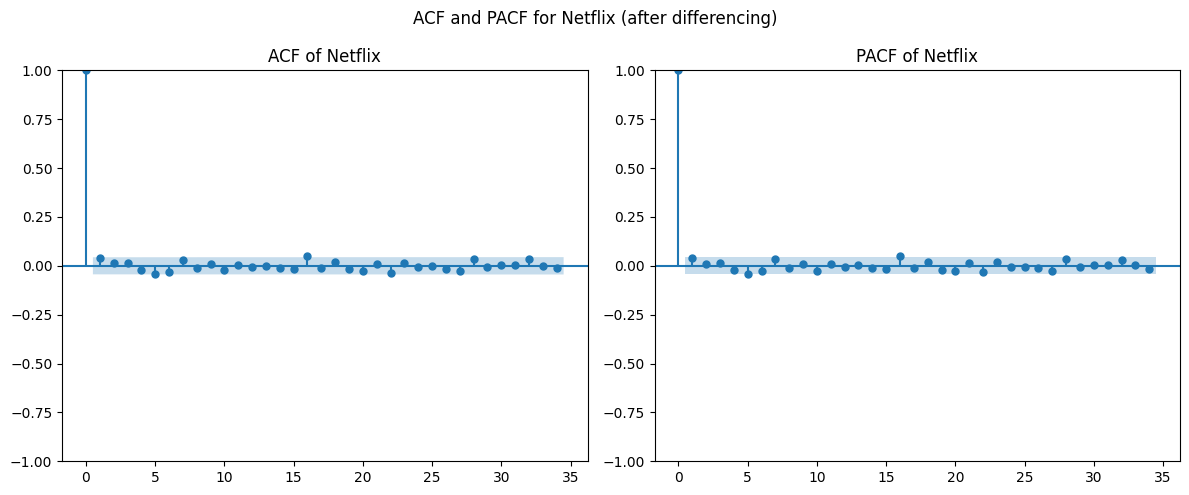

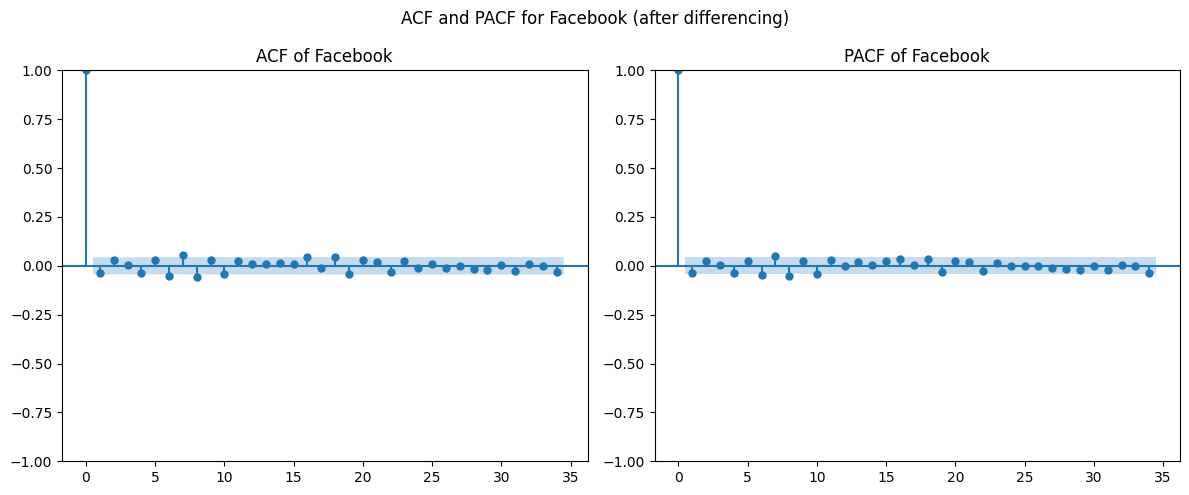

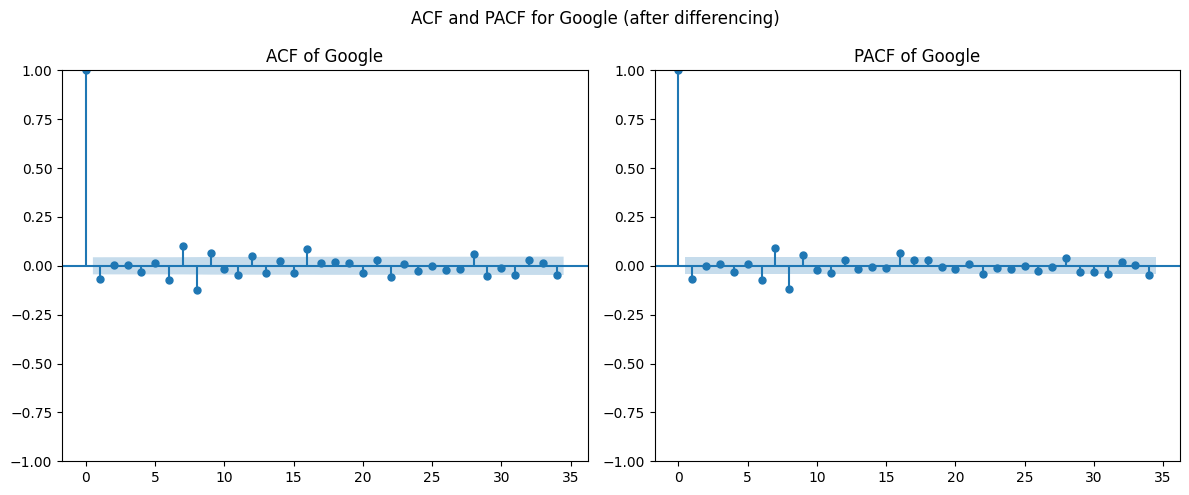

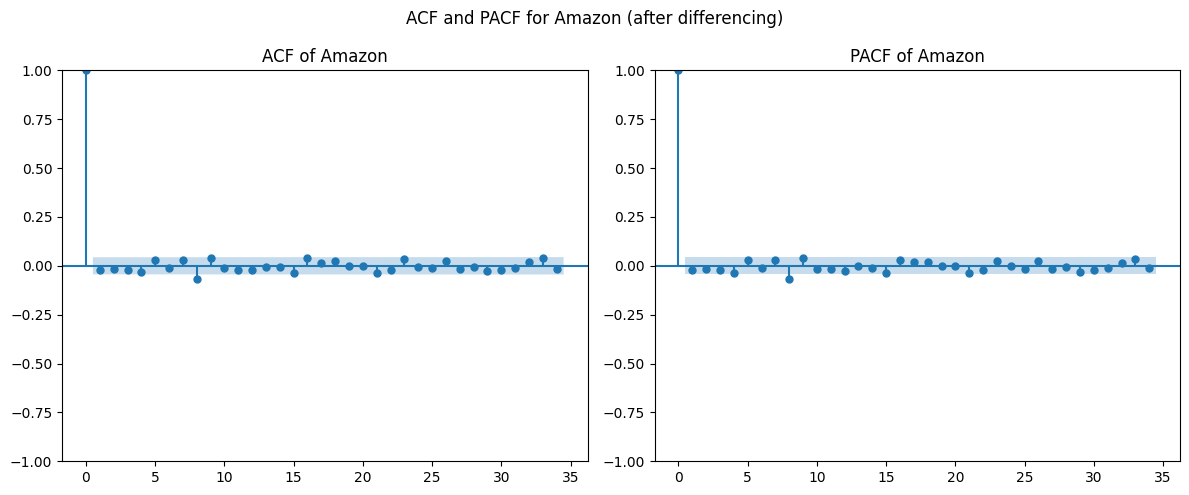

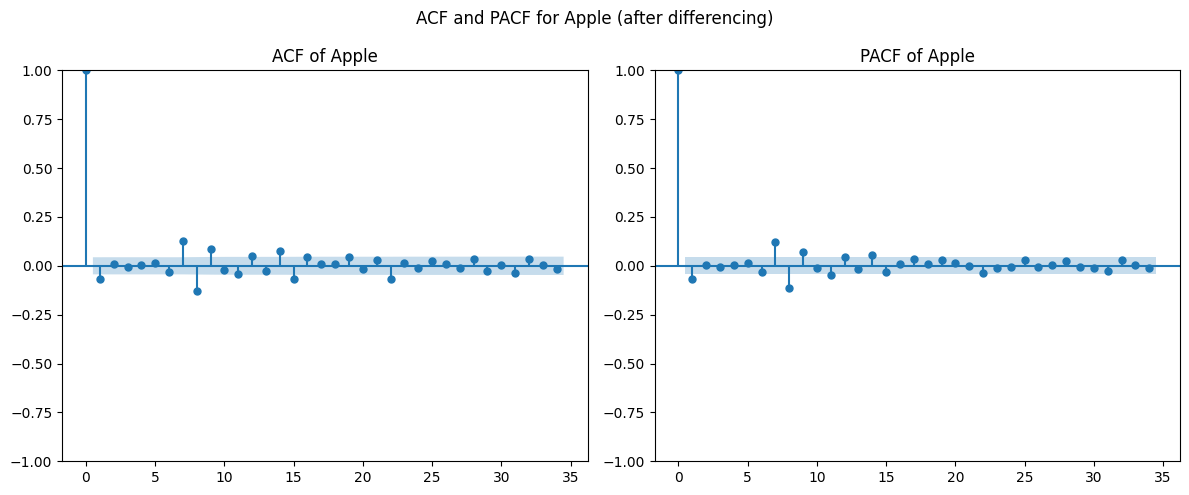

In [34]:
for col in diff_data.columns:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plot_acf(diff_data[col].dropna(), ax=plt.gca(), title=f'ACF of {col}')

    plt.subplot(1, 2, 2)
    plot_pacf(diff_data[col].dropna(), ax=plt.gca(), title=f'PACF of {col}')

    plt.suptitle(f"ACF and PACF for {col} (after differencing)")
    plt.tight_layout()
    plt.show()

In [35]:
from statsmodels.tsa.stattools import grangercausalitytests

# Define maximum number of lags to test for causation
max_lag = 5
significance_level = 0.05  # Significance level for causation

# Check Granger causality between each pair of companies
causality_results = {}  # Dictionary to store results
for i, company_1 in enumerate(diff_data.columns):  # Exclude 'Month' if added
    for j, company_2 in enumerate(diff_data.columns):
        if company_1 != company_2:
            print(f"\nTesting if {company_1} Granger-causes {company_2}:")
            test_result = grangercausalitytests(diff_data[[company_2, company_1]].dropna(), max_lag, verbose=False)

            # Extract and print p-values for each lag
            p_values = [round(test_result[lag][0]['ssr_ftest'][1], 4) for lag in range(1, max_lag + 1)]
            causality_results[(company_1, company_2)] = p_values

            # Interpret results based on significance level
            for lag, p_value in enumerate(p_values, start=1):
                if p_value < significance_level:
                    print(f"  Lag {lag}: p-value = {p_value} (Significant causation)")
                else:
                    print(f"  Lag {lag}: p-value = {p_value} (No significant causation)")
def find_significant_causation(data, max_lag=5, significance_level=0.05):
    significant_pairs = []
    columns = data.columns

    # Iterate over all unique pairs of columns
    for i in range(len(columns)):
        for j in range(len(columns)):
            if i != j:
                # Perform Granger causality test on the pair (columns[i], columns[j])
                test_result = grangercausalitytests(data[[columns[i], columns[j]]].dropna(), max_lag, verbose=False)
                
                # Check if any lag gives a significant p-value
                for lag, result in test_result.items():
                    p_value = result[0]['ssr_chi2test'][1]
                    if p_value < significance_level:
                        significant_pairs.append((columns[i], columns[j], lag, p_value))
                        break  # Stop at the first significant lag for this pair

    return significant_pairs

# Apply the function on diff_data and print the results
significant_pairs = find_significant_causation(diff_data)
print("Significant causation pairs with p-value below 0.05:")

for pair in significant_pairs:
    print(f"Column {pair[0]} causes Column {pair[1]} at lag {pair[2]} with p-value {pair[3]:.4f}")




Testing if Netflix Granger-causes Facebook:
  Lag 1: p-value = 0.7807 (No significant causation)
  Lag 2: p-value = 0.5894 (No significant causation)
  Lag 3: p-value = 0.7957 (No significant causation)
  Lag 4: p-value = 0.882 (No significant causation)
  Lag 5: p-value = 0.9449 (No significant causation)

Testing if Netflix Granger-causes Google:
  Lag 1: p-value = 0.5158 (No significant causation)
  Lag 2: p-value = 0.7307 (No significant causation)
  Lag 3: p-value = 0.3944 (No significant causation)
  Lag 4: p-value = 0.5283 (No significant causation)
  Lag 5: p-value = 0.5646 (No significant causation)

Testing if Netflix Granger-causes Amazon:
  Lag 1: p-value = 0.665 (No significant causation)
  Lag 2: p-value = 0.7751 (No significant causation)
  Lag 3: p-value = 0.6298 (No significant causation)
  Lag 4: p-value = 0.7495 (No significant causation)
  Lag 5: p-value = 0.7199 (No significant causation)

Testing if Netflix Granger-causes Apple:


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Lag 1: p-value = 0.0053 (Significant causation)
  Lag 2: p-value = 0.0133 (Significant causation)
  Lag 3: p-value = 0.0309 (Significant causation)
  Lag 4: p-value = 0.0327 (Significant causation)
  Lag 5: p-value = 0.0407 (Significant causation)

Testing if Facebook Granger-causes Netflix:
  Lag 1: p-value = 0.5457 (No significant causation)
  Lag 2: p-value = 0.2093 (No significant causation)
  Lag 3: p-value = 0.2245 (No significant causation)
  Lag 4: p-value = 0.3409 (No significant causation)
  Lag 5: p-value = 0.4891 (No significant causation)

Testing if Facebook Granger-causes Google:
  Lag 1: p-value = 0.9784 (No significant causation)
  Lag 2: p-value = 0.8594 (No significant causation)
  Lag 3: p-value = 0.9473 (No significant causation)
  Lag 4: p-value = 0.8763 (No significant causation)
  Lag 5: p-value = 0.851 (No significant causation)

Testing if Facebook Granger-causes Amazon:
  Lag 1: p-value = 0.0013 (Significant causation)
  Lag 2: p-value = 0.0007 (Significant

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Lag 1: p-value = 0.1637 (No significant causation)
  Lag 2: p-value = 0.3768 (No significant causation)
  Lag 3: p-value = 0.4902 (No significant causation)
  Lag 4: p-value = 0.6116 (No significant causation)
  Lag 5: p-value = 0.7522 (No significant causation)

Testing if Google Granger-causes Netflix:
  Lag 1: p-value = 0.815 (No significant causation)
  Lag 2: p-value = 0.9678 (No significant causation)
  Lag 3: p-value = 0.1529 (No significant causation)
  Lag 4: p-value = 0.2459 (No significant causation)
  Lag 5: p-value = 0.3185 (No significant causation)

Testing if Google Granger-causes Facebook:
  Lag 1: p-value = 0.0313 (Significant causation)
  Lag 2: p-value = 0.0651 (No significant causation)
  Lag 3: p-value = 0.085 (No significant causation)
  Lag 4: p-value = 0.037 (Significant causation)
  Lag 5: p-value = 0.0658 (No significant causation)

Testing if Google Granger-causes Amazon:
  Lag 1: p-value = 0.3092 (No significant causation)
  Lag 2: p-value = 0.2021 (No si

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Lag 1: p-value = 0.0659 (No significant causation)
  Lag 2: p-value = 0.1218 (No significant causation)
  Lag 3: p-value = 0.1181 (No significant causation)
  Lag 4: p-value = 0.1147 (No significant causation)
  Lag 5: p-value = 0.1526 (No significant causation)

Testing if Amazon Granger-causes Netflix:
  Lag 1: p-value = 0.0942 (No significant causation)
  Lag 2: p-value = 0.24 (No significant causation)
  Lag 3: p-value = 0.1281 (No significant causation)
  Lag 4: p-value = 0.0669 (No significant causation)
  Lag 5: p-value = 0.0853 (No significant causation)

Testing if Amazon Granger-causes Facebook:
  Lag 1: p-value = 0.0235 (Significant causation)
  Lag 2: p-value = 0.053 (No significant causation)
  Lag 3: p-value = 0.0929 (No significant causation)
  Lag 4: p-value = 0.1261 (No significant causation)
  Lag 5: p-value = 0.199 (No significant causation)

Testing if Amazon Granger-causes Google:
  Lag 1: p-value = 0.9847 (No significant causation)
  Lag 2: p-value = 0.5448 (No 

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Lag 1: p-value = 0.1699 (No significant causation)
  Lag 2: p-value = 0.2683 (No significant causation)
  Lag 3: p-value = 0.4402 (No significant causation)
  Lag 4: p-value = 0.5092 (No significant causation)
  Lag 5: p-value = 0.5057 (No significant causation)

Testing if Apple Granger-causes Netflix:
  Lag 1: p-value = 0.0206 (Significant causation)
  Lag 2: p-value = 0.0506 (No significant causation)
  Lag 3: p-value = 0.0345 (Significant causation)
  Lag 4: p-value = 0.0589 (No significant causation)
  Lag 5: p-value = 0.0541 (No significant causation)

Testing if Apple Granger-causes Facebook:
  Lag 1: p-value = 0.0009 (Significant causation)
  Lag 2: p-value = 0.0033 (Significant causation)
  Lag 3: p-value = 0.009 (Significant causation)
  Lag 4: p-value = 0.0125 (Significant causation)
  Lag 5: p-value = 0.023 (Significant causation)

Testing if Apple Granger-causes Google:


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Lag 1: p-value = 0.0016 (Significant causation)
  Lag 2: p-value = 0.0024 (Significant causation)
  Lag 3: p-value = 0.0052 (Significant causation)
  Lag 4: p-value = 0.0034 (Significant causation)
  Lag 5: p-value = 0.0035 (Significant causation)

Testing if Apple Granger-causes Amazon:
  Lag 1: p-value = 0.0041 (Significant causation)
  Lag 2: p-value = 0.0116 (Significant causation)
  Lag 3: p-value = 0.03 (Significant causation)
  Lag 4: p-value = 0.0251 (Significant causation)
  Lag 5: p-value = 0.0434 (Significant causation)


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print resul

Significant causation pairs with p-value below 0.05:
Column Netflix causes Column Apple at lag 1 with p-value 0.0204
Column Facebook causes Column Google at lag 1 with p-value 0.0311
Column Facebook causes Column Amazon at lag 1 with p-value 0.0233
Column Facebook causes Column Apple at lag 1 with p-value 0.0009
Column Google causes Column Apple at lag 1 with p-value 0.0016
Column Amazon causes Column Facebook at lag 1 with p-value 0.0013
Column Amazon causes Column Google at lag 3 with p-value 0.0352
Column Amazon causes Column Apple at lag 1 with p-value 0.0040
Column Apple causes Column Netflix at lag 1 with p-value 0.0052


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


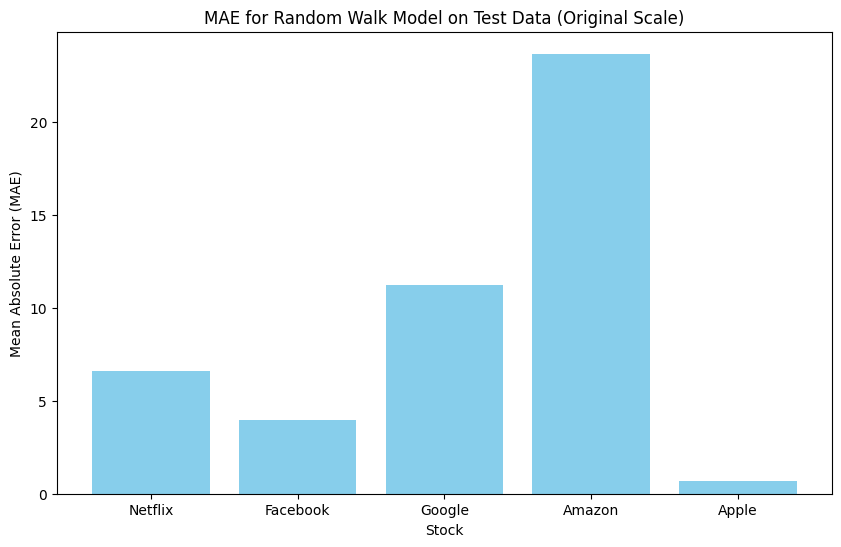

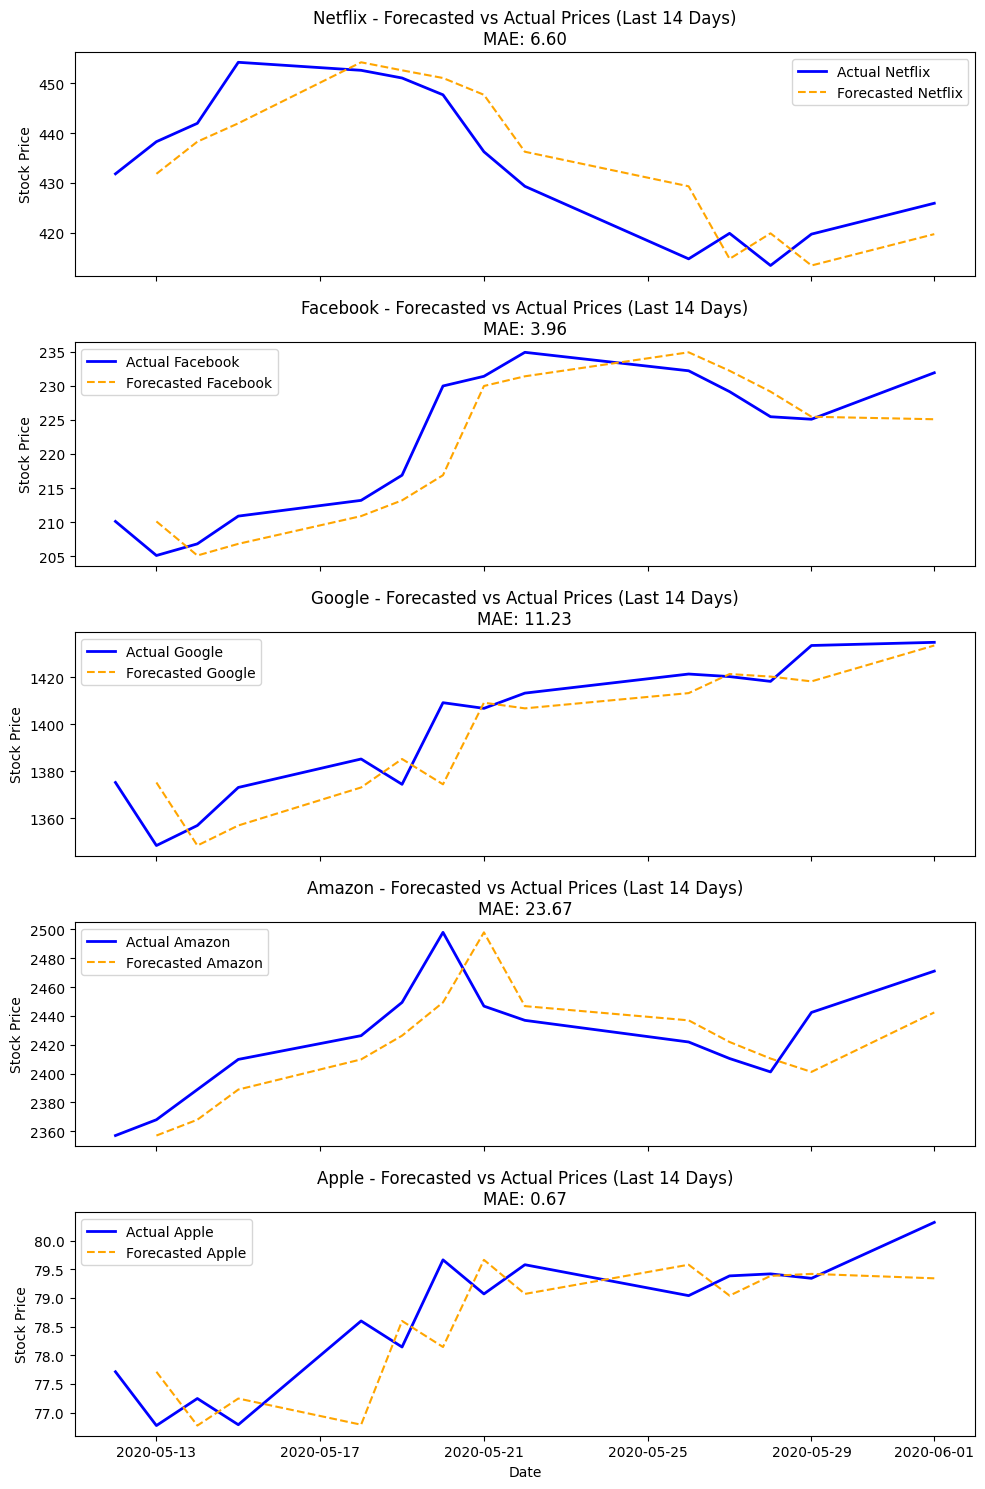

In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Assuming diff_data is the differenced log-transformed data and the last 14 rows are for testing
train_data = diff_data.iloc[:-14]
test_data = diff_data.iloc[-14:]

# Initialize a dictionary to store MAE values for the test set
mae_values = {}

# Initialize dictionary to store forecasts on the log scale
forecasted_log_data = {}

# Loop over each stock column
for stock in train_data.columns:
    # Generate forecasted differenced values (random walk model)
    forecast_diff = test_data[stock].shift(1)
    
    # Undo the differencing on log scale by adding to the last observed log value in the train set
    last_log_value = log_data[stock].iloc[-15]  # Last known value before the test period
    forecasted_log_data[stock] = forecast_diff.cumsum() + last_log_value

# Convert forecasted log data to DataFrame
forecasted_log_df = pd.DataFrame(forecasted_log_data)

# Undo the log transformation to get the forecast on the original scale
forecasted_original_df = np.exp(forecasted_log_df)

# For plotting purposes, get the actual prices for the test period (original scale)
actual_test_data = data.iloc[-14:]

# Calculate MAE between forecasted and actual values for each stock
for stock in forecasted_original_df.columns:
    # Drop NaNs to align the two series
    valid_data = pd.DataFrame({
        "actual": actual_test_data[stock],
        "forecasted": forecasted_original_df[stock]
    }).dropna()
    
    # Calculate MAE and store in dictionary
    mae = mean_absolute_error(valid_data["actual"], valid_data["forecasted"])
    mae_values[stock] = mae

# Plotting MAE values as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(mae_values.keys(), mae_values.values(), color='skyblue')
plt.xlabel('Stock')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Random Walk Model on Test Data (Original Scale)')
plt.show()

# Plotting individual graphs for each stock
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 15), sharex=True)

for i, stock in enumerate(test_data.columns):
    # Plot actual prices in bold
    axs[i].plot(actual_test_data.index, actual_test_data[stock], label=f'Actual {stock}', color='blue', linewidth=2)
    # Plot forecasted prices in dotted line
    axs[i].plot(forecasted_original_df.index, forecasted_original_df[stock], linestyle='--', label=f'Forecasted {stock}', color='orange')
    axs[i].set_title(f'{stock} - Forecasted vs Actual Prices (Last 14 Days)\nMAE: {mae_values[stock]:.2f}')
    axs[i].set_ylabel('Stock Price')
    axs[i].legend()

# Set common labels
plt.xlabel('Date')
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


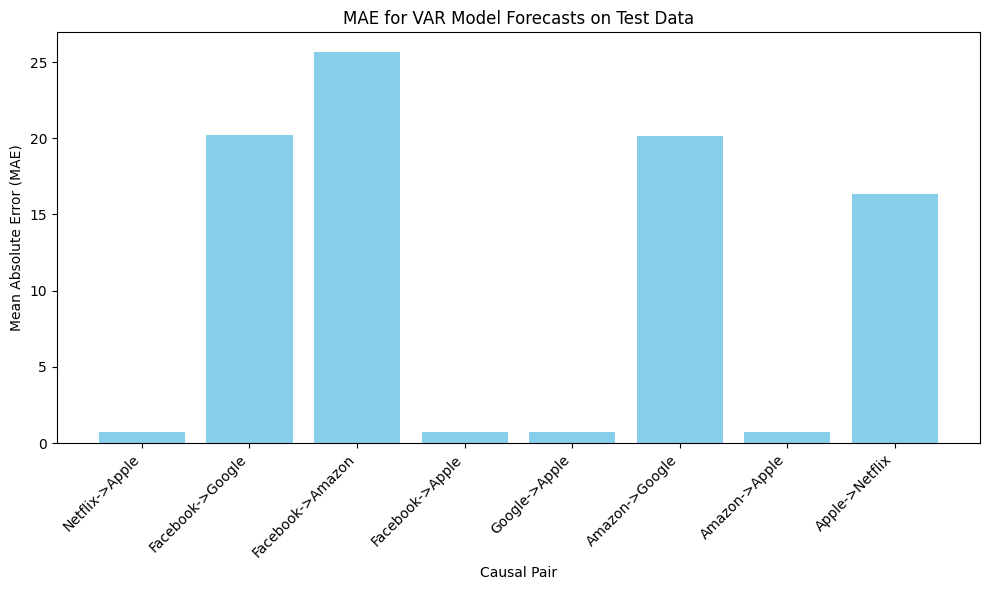

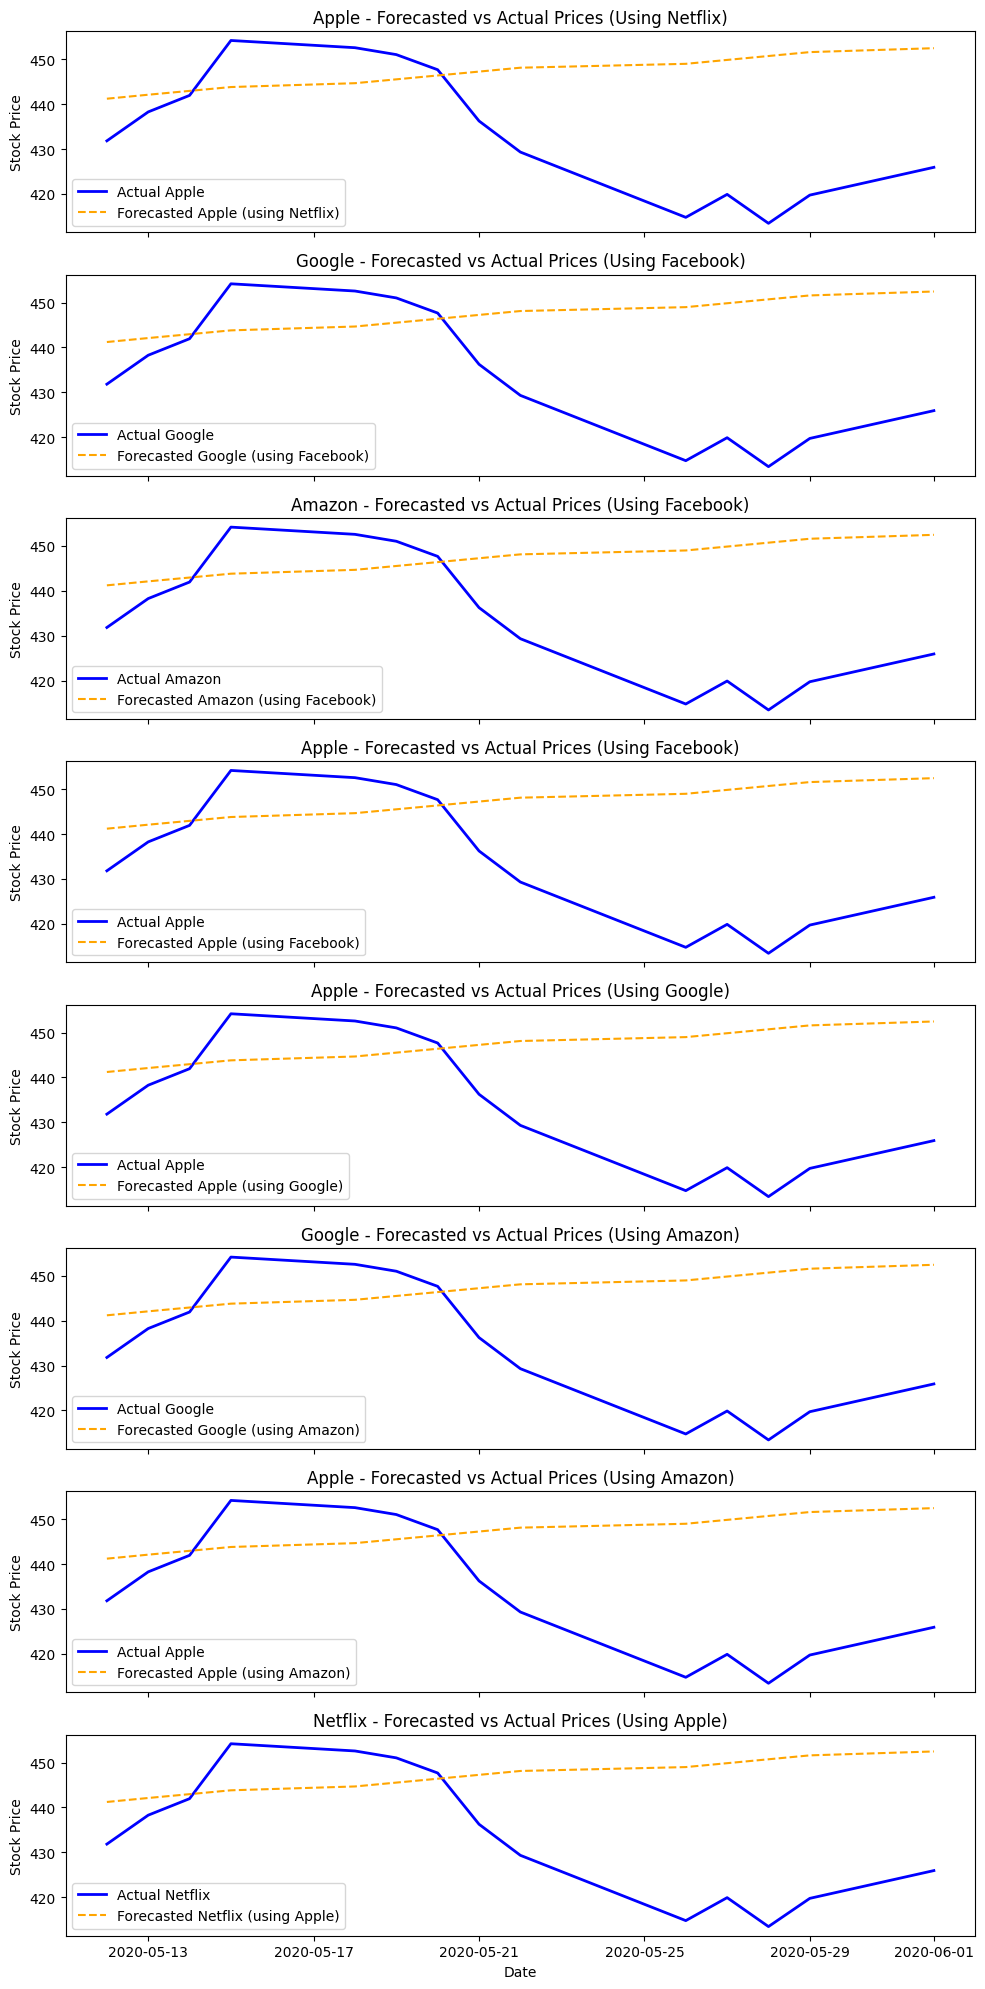

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.api import VAR
import warnings

# Initialize dictionary for MAE and forecasted values
mae_values = {}
forecasted_values = {}
pairs = [
    ("Netflix", "Apple", 1),
    ("Facebook", "Google", 1),
    ("Facebook", "Amazon", 1),
    ("Facebook", "Apple", 1),
    ("Google", "Apple", 1),
    ("Amazon", "Google", 3),
    ("Amazon", "Apple", 1),
    ("Apple", "Netflix", 1)
]

# Loop over each causal pair with a specified lag
for source, target, lag in pairs:
    try:
        # Subset the relevant columns from `diff_data`
        data_pair = diff_data[[source, target]].dropna()

        # Fit the VAR model on training data with reduced lags if needed
        model = VAR(data_pair.iloc[:-14])

        # Try fitting with original lag, reduce if SVD does not converge
        try:
            var_results = model.fit(lag)
        except np.linalg.LinAlgError:
            warnings.warn(f"SVD did not converge with lag {lag} for {source} causing {target}. Reducing lag.")
            var_results = model.fit(max(1, lag - 1))

        # Forecast using the fitted VAR model
        lagged_values = data_pair.iloc[-lag:]
        forecast_diff = var_results.forecast(lagged_values.values, steps=14)
        forecast_diff_df = pd.DataFrame(forecast_diff, columns=[source, target], index=data_pair.index[-14:])

        # Undo differencing and log transformation for forecasts
        last_log_value = log_data[target].iloc[-15]
        forecast_log = forecast_diff_df[target].cumsum() + last_log_value
        forecast_original = np.exp(forecast_log)

        # Store forecast and calculate MAE on original scale
        forecasted_values[(source, target)] = forecast_original
        actual_values = data[target].iloc[-14:]
        mae = mean_absolute_error(actual_values, forecast_original)
        mae_values[(source, target)] = mae

    except Exception as e:
        print(f"Error processing {source} causing {target} at lag {lag}: {e}")
        continue

# Plotting MAE values as a bar chart
plt.figure(figsize=(10, 6))
plt.bar([f"{src}->{tgt}" for src, tgt, _ in pairs], mae_values.values(), color='skyblue')
plt.xlabel('Causal Pair')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for VAR Model Forecasts on Test Data')
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align to the right
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Plot actual vs. forecasted values for each pair
fig, axs = plt.subplots(len(pairs), 1, figsize=(10, 20), sharex=True)

for i, (source, target, _) in enumerate(pairs):
    # Plot actual and forecasted values
    axs[i].plot(actual_values.index, actual_values, label=f'Actual {target}', color='blue', linewidth=2)
    axs[i].plot(forecast_original.index, forecast_original, linestyle='--', label=f'Forecasted {target} (using {source})', color='orange')
    
    # Set plot title and labels
    axs[i].set_title(f'{target} - Forecasted vs Actual Prices (Using {source})')
    axs[i].set_ylabel('Stock Price')
    axs[i].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()
